### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [1]:
# My LSE_DA_NHS_analysis GitHub repository.
# Repository URL: https://github.com/SanaFed/LSE_DA_NHS_analysis

# Assignment activity 2

### Prepare your workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from datetime import datetime

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as actual_duration.
actual_duration = pd.read_csv('actual_duration.csv')

print('Shape:\n', actual_duration.shape)
print('\nColumns names:\n', actual_duration.columns)
print('\nColumns types:\n', actual_duration.dtypes)
print('\nSum of missing values:\n', actual_duration.isnull().sum())

# View the DataFrame.
actual_duration.head()

Shape:
 (137793, 8)

Columns names:
 Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')

Columns types:
 sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

Sum of missing values:
 sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [4]:
# Determine whether there are missing values.
actual_duration.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [5]:
# Determine the metadata of the data set.
actual_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [6]:
# Determine the descriptive statistics of the data set.
actual_duration.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Change the date format of actual_duration['appointment_date'].
actual_duration['appointment_date'] = actual_duration['appointment_date'].\
apply(pd.to_datetime)

# Determine the time period included in the data set.
print('From:', actual_duration['appointment_date'].min().strftime('%d-%m-%Y'))
print('To:', actual_duration['appointment_date'].max().strftime('%d-%m-%Y'))

From: 01-12-2021
To: 30-06-2022


In [8]:
# Determine the number of appointments in the data set.
actual_duration['count_of_appointments'].sum()

167980692

In [9]:
# View top 10 records by highest number of appointments in the data set (incl. location
# name, ICB code (area), appointment date, actual duration of the appointment, 
# number of appointments).
actual_duration[['sub_icb_location_name', 'icb_ons_code', 'appointment_date', 
                 'actual_duration', 'count_of_appointments']].\
                sort_values('count_of_appointments', ascending=False).head(10)

# E54000029 - NHS North East London Integrated Care Board.

,sub_icb_location_name,icb_ons_code,appointment_date,actual_duration,count_of_appointments
125518,NHS North East London ICB - A3A8R,E54000029,2022-01-17,Unknown / Data Quality,15400
125812,NHS North East London ICB - A3A8R,E54000029,2022-02-28,Unknown / Data Quality,15081
125861,NHS North East London ICB - A3A8R,E54000029,2022-03-07,Unknown / Data Quality,14767
126400,NHS North East London ICB - A3A8R,E54000029,2022-05-23,Unknown / Data Quality,14665
125616,NHS North East London ICB - A3A8R,E54000029,2022-01-31,Unknown / Data Quality,14664
125567,NHS North East London ICB - A3A8R,E54000029,2022-01-24,Unknown / Data Quality,14627
125665,NHS North East London ICB - A3A8R,E54000029,2022-02-07,Unknown / Data Quality,14524
125959,NHS North East London ICB - A3A8R,E54000029,2022-03-21,Unknown / Data Quality,14516
126596,NHS North East London ICB - A3A8R,E54000029,2022-06-20,Unknown / Data Quality,14501
125224,NHS North East London ICB - A3A8R,E54000029,2021-12-06,Unknown / Data Quality,14494


In [10]:
# Import and sense-check the appointments_regional.csv data set as appointments_regional.
appointments_regional = pd.read_csv('appointments_regional.csv')

print('Shape:\n', appointments_regional.shape)
print('\nColumns names:\n', appointments_regional.columns)
print('\nColumns types:\n', appointments_regional.dtypes)
print('\nSum of missing values:\n', appointments_regional.isnull().sum())

# View the DataFrame.
appointments_regional.head()

Shape:
 (596821, 7)

Columns names:
 Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

Columns types:
 icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

Sum of missing values:
 icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [11]:
# Determine whether there are missing values.
appointments_regional.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [12]:
# Determine the metadata of the data set.
appointments_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [13]:
# Determine the descriptive statistics of the data set.
appointments_regional.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [14]:
# Determine the time period included in the data set.
appointments_regional['appointment_month'].unique()

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
      dtype=object)

In [15]:
# Determine the number of appointments in the data set.
appointments_regional['count_of_appointments'].sum()

742804525

In [16]:
# View top 10 records by highest number of appointments in the data set.
appointments_regional.sort_values('count_of_appointments', ascending=False).head(10)

# E54000027 - NHS North West London ICB.
# E54000029 - NHS North East London ICB.

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
144544,E54000027,2020-01,Attended,GP,Face-to-Face,Same Day,211265
409005,E54000029,2020-01,Attended,GP,Face-to-Face,Same Day,203378
145905,E54000027,2020-06,Attended,GP,Telephone,Same Day,191019
410298,E54000029,2020-06,Attended,GP,Telephone,Same Day,186344
144828,E54000027,2020-02,Attended,GP,Face-to-Face,Same Day,185930
146165,E54000027,2020-07,Attended,GP,Telephone,Same Day,185210
411019,E54000029,2020-09,Attended,GP,Telephone,Same Day,184462
145404,E54000027,2020-04,Attended,GP,Telephone,Same Day,183931
410534,E54000029,2020-07,Attended,GP,Telephone,Same Day,182856
146647,E54000027,2020-09,Attended,GP,Telephone,Same Day,178769


In [17]:
# Import and sense-check the national_categories.xlsx data set as national_categories.
national_categories = pd.read_excel('national_categories.xlsx')

print('Shape:\n', national_categories.shape)
print('\nColumns names:\n', national_categories.columns)
print('\nColumns types:\n', national_categories.dtypes)
print('\nSum of missing values:\n', national_categories.isnull().sum()) 

# View the DataFrame.
national_categories.head()

Shape:
 (817394, 8)

Columns names:
 Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

Columns types:
 appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

Sum of missing values:
 appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [18]:
# Determine whether there are missing values.
national_categories.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [19]:
# Determine the metadata of the data set.
national_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [20]:
# Determine the descriptive statistics of the data set.
national_categories.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


In [21]:
# Determine the time period included in the data set.
print('From:', national_categories['appointment_date'].min().strftime('%d-%m-%Y'))
print('To:', national_categories['appointment_date'].max().strftime('%d-%m-%Y'))

From: 01-08-2021
To: 30-06-2022


In [22]:
# Determine the number of appointments in the data set.
national_categories['count_of_appointments'].sum()

296046770

In [23]:
# View top 10 records by highest number of appointments in the data set (incl. location
# name, ICB code (area), appointment date, actual duration of the appointment, 
# number of appointments).
national_categories[['sub_icb_location_name', 'icb_ons_code', 'appointment_date', 
                     'service_setting', 'context_type', 'national_category', 
                     'count_of_appointments']].\
                    sort_values('count_of_appointments', ascending=False).head(10)

# E54000029 - NHS North East London ICB.

,sub_icb_location_name,icb_ons_code,appointment_date,service_setting,context_type,national_category,count_of_appointments
732144,NHS North East London ICB - A3A8R,E54000029,2022-05-09,General Practice,Care Related Encounter,General Consultation Routine,16590
732705,NHS North East London ICB - A3A8R,E54000029,2022-05-23,General Practice,Care Related Encounter,General Consultation Routine,16527
724735,NHS North East London ICB - A3A8R,E54000029,2021-10-11,General Practice,Care Related Encounter,General Consultation Routine,16495
724978,NHS North East London ICB - A3A8R,E54000029,2021-10-18,General Practice,Care Related Encounter,General Consultation Routine,16492
732446,NHS North East London ICB - A3A8R,E54000029,2022-05-16,General Practice,Care Related Encounter,General Consultation Routine,16412
725746,NHS North East London ICB - A3A8R,E54000029,2021-11-08,General Practice,Care Related Encounter,General Consultation Routine,16368
733413,NHS North East London ICB - A3A8R,E54000029,2022-06-13,General Practice,Care Related Encounter,General Consultation Routine,16333
729676,NHS North East London ICB - A3A8R,E54000029,2022-02-28,General Practice,Care Related Encounter,General Consultation Routine,16283
733930,NHS North East London ICB - A3A8R,E54000029,2022-06-27,General Practice,Care Related Encounter,General Consultation Routine,16242
726268,NHS North East London ICB - A3A8R,E54000029,2021-11-22,General Practice,Care Related Encounter,General Consultation Routine,16170


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [24]:
# Determine the number of locations in actual_duration DataFrame.
print('Count of locations by location name (sub-ICB): ', 
      len(actual_duration['sub_icb_location_name'].unique()))
print('Count of locations by area (ICB): ', 
      len(actual_duration['icb_ons_code'].unique()))

Count of locations by location name (sub-ICB):  106
Count of locations by area (ICB):  42


In [25]:
# Determine the number of locations in appointments_regional DataFrame.
print('Count of locations by area (ICB): ', 
      len(appointments_regional['icb_ons_code'].unique()))

Count of locations by area (ICB):  42


In [26]:
# Determine the number of locations in national_categories DataFrame.
print('Count of locations by location name (sub-ICB): ', 
      len(national_categories['sub_icb_location_name'].unique()))
print('Count of locations by area (ICB): ', 
      len(national_categories['icb_ons_code'].unique()))

Count of locations by location name (sub-ICB):  106
Count of locations by area (ICB):  42


**Question 2:** What are the five locations with the highest number of records?



In [27]:
# Select locations (by location name) based on record count.
national_categories1 = national_categories['sub_icb_location_name'].value_counts().\
reset_index(name='count_of_records')

# View top 5 locations.
national_categories1.head()

,index,count_of_records
0,NHS North West London ICB - W2U3Z,13007
1,NHS Kent and Medway ICB - 91Q,12637
2,NHS Devon ICB - 15N,12526
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
4,NHS North East London ICB - A3A8R,11837


In [28]:
# Export above DataFrame as CSV file.
national_categories1.head().to_csv('Top_5_locs(by_records).csv')

In [29]:
# Determine the top five locations (by location name) based on number of appointments.
nc_loc_n = national_categories.groupby('sub_icb_location_name')['count_of_appointments'].sum()

print('Total number of appointments:', national_categories['count_of_appointments'].sum())
print('\nTotal number of appointments in top 5 below locations:', 
      nc_loc_n.sort_values(ascending=False).head().sum())
nc_loc_n.sort_values(ascending=False).reset_index().head()

Total number of appointments: 296046770

Total number of appointments in top 5 below locations: 47155720


,sub_icb_location_name,count_of_appointments
0,NHS North West London ICB - W2U3Z,12142390
1,NHS North East London ICB - A3A8R,9588891
2,NHS Kent and Medway ICB - 91Q,9286167
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
4,NHS South East London ICB - 72Q,7850170


In [30]:
# Export above DataFrame as CSV file.
nc_loc_n.sort_values(ascending=False).reset_index().head().\
to_csv('Top_5_locs(by_app).csv')

In [31]:
# Determine the top five locations (by location name) based on number of GP appointments.
nc_loc_ss = national_categories.groupby(['sub_icb_location_name', 'service_setting'], 
                                        as_index=False)['count_of_appointments'].sum()

# Top five locations (by location name) based on number of GP appointments.
nc_loc_gp = nc_loc_ss[nc_loc_ss['service_setting'] == 'General Practice'].\
sort_values('count_of_appointments', ascending=False)

# View number of GP appointments in top 5 locations.
print('Total number of GP appointments:', nc_loc_gp['count_of_appointments'].sum())
print('Total number of GP appointments in top 5 locations:', 
      nc_loc_gp.head()['count_of_appointments'].sum())
nc_loc_gp.reset_index(drop=True).head()

Total number of GP appointments: 270811691
Total number of GP appointments in top 5 locations: 43054915


,sub_icb_location_name,service_setting,count_of_appointments
0,NHS North West London ICB - W2U3Z,General Practice,10432225
1,NHS North East London ICB - A3A8R,General Practice,9174258
2,NHS Kent and Medway ICB - 91Q,General Practice,8645534
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,General Practice,7407509
4,NHS South East London ICB - 72Q,General Practice,7395389


In [32]:
# Export above DataFrame as CSV file.
nc_loc_gp.reset_index(drop=True).head().to_csv('Top_5_locs_gp(by_app).csv')

In [33]:
# Determine the top five areas (by ICB code) based on number of appointments.
nc_icb = national_categories.groupby('icb_ons_code')['count_of_appointments'].sum()

print('Total number of appointments:', national_categories['count_of_appointments'].sum())
print('\nTotal number of appointments in top 5 below areas:', nc_icb.\
      sort_values(ascending=False).head().sum())
nc_icb.sort_values(ascending=False).reset_index().head()

# E54000050 - NHS North East and North Cumbria ICB;
# E54000054 - NHS West Yorkshire ICB;
# E54000057 - NHS Greater Manchester ICB;
# E54000008 - NHS Cheshire and Merseyside ICB;
# E54000027 - NHS North West London ICB.

Total number of appointments: 296046770

Total number of appointments in top 5 below areas: 70491207


,icb_ons_code,count_of_appointments
0,E54000050,16882235
1,E54000054,14358371
2,E54000057,13857900
3,E54000008,13250311
4,E54000027,12142390


In [34]:
# Export above DataFrame as CSV file.
nc_icb.sort_values(ascending=False).reset_index().head().to_csv('Top_5_icb(by_app).csv')

In [35]:
# Determine the top five areas (by ICB code) based on number of GP appointments.
nc_icb_ss = national_categories.groupby(['icb_ons_code', 'service_setting'], 
                                        as_index=False)['count_of_appointments'].sum()

# Top five locations (by location name) based on number of GP appointments.
nc_icb_gp = nc_icb_ss[nc_icb_ss['service_setting'] == 'General Practice'].\
sort_values('count_of_appointments', ascending=False)

# View number of GP appointments in top 5 areas.
print('Total number of GP appointments:', nc_icb_gp['count_of_appointments'].sum())
print('Total number of GP appointments in top 5 areas:', 
      nc_icb_gp.head()['count_of_appointments'].sum())
nc_icb_gp.reset_index(drop=True).head()

# E54000050 - NHS North East and North Cumbria ICB;
# E54000054 - NHS West Yorkshire ICB;
# E54000008 - NHS Cheshire and Merseyside ICB;
# E54000057 - NHS Greater Manchester ICB;
# E54000027 - NHS North West London ICB.

Total number of GP appointments: 270811691
Total number of GP appointments in top 5 areas: 63867876


,icb_ons_code,service_setting,count_of_appointments
0,E54000050,General Practice,15794580
1,E54000054,General Practice,12611739
2,E54000008,General Practice,12602953
3,E54000057,General Practice,12426379
4,E54000027,General Practice,10432225


In [36]:
# Export above DataFrame as CSV file.
nc_icb_gp.reset_index(drop=True).head().to_csv('Top_5_icb_gp(by_app).csv')

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [37]:
# Determine the number of service settings.
print('Total number of service settings: ', national_categories['service_setting'].count()) 
print('Number of service settings by cattegory: \n', 
      national_categories['service_setting'].value_counts())

Total number of service settings:  817394
Number of service settings by cattegory: 
 General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


In [38]:
# Determine the number of context types.
print('\nTotal number of context types: ', national_categories['context_type'].count())
print('Number of context types by cattegory: \n', 
      national_categories['context_type'].value_counts())


Total number of context types:  817394
Number of context types by cattegory: 
 Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


In [39]:
# Determine the number of national categories.
print('\nTotal number of national categories: ', 
      national_categories['national_category'].count())
print('Number of national categories by cattegory: \n', 
      national_categories['national_category'].value_counts())


Total number of national categories:  817394
Number of national categories by cattegory: 
 Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                     

In [40]:
# Determine the number of appointment status.
print('\nTotal number of appointment statuses: ', 
      appointments_regional['appointment_status'].count())
print('Number of appointment statuses by cattegory: \n', 
      appointments_regional['appointment_status'].value_counts())


Total number of appointment statuses:  596821
Number of appointment statuses by cattegory: 
 Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


**Additional questions:**

**Question 4:** Sum appointments by appointment status and by time between booking and time of the appointment. How many GP appointments were attended by time between booking and time of the appointment?

In [41]:
# Number of appointments by appointment status and by time between booking and time of 
# the appointment.
ar_time = appointments_regional.groupby(['appointment_status', 
                                         'time_between_book_and_appointment'], 
                                        as_index=False)['count_of_appointments'].sum().\
                                        sort_values(['appointment_status', 
                                                    'count_of_appointments'], 
                                                    ascending=False)

# View DataFrame.
ar_time.reset_index(drop=True)

,appointment_status,time_between_book_and_appointment,count_of_appointments
0,Unknown,Same Day,8314250
1,Unknown,2 to 7 Days,6994033
2,Unknown,8 to 14 Days,5561043
3,Unknown,More than 28 Days,4315302
4,Unknown,15 to 21 Days,3585069
5,Unknown,22 to 28 Days,2738242
6,Unknown,1 Day,2524728
7,Unknown,Unknown / Data Quality,104749
8,DNA,2 to 7 Days,8697476
9,DNA,8 to 14 Days,6193368


In [42]:
# Number of attended GP appointments by time between booking and time of the appointment.
ar_time_gp = appointments_regional.groupby(['hcp_type', 'appointment_status', 
                                         'time_between_book_and_appointment'], 
                                        as_index=False)['count_of_appointments'].sum().\
                                        sort_values(['appointment_status', 
                                                    'count_of_appointments'], 
                                                    ascending=False)

# View DataFrame.
print('Total number of GP appointments:', 
      ar_time_gp[ar_time_gp['hcp_type'] == 'GP']\
      ['count_of_appointments'].sum())
print('Total number of attended GP appointments:', 
      ar_time_gp[(ar_time_gp['hcp_type'] == 'GP') & \
           (ar_time_gp['appointment_status'] == 'Attended')]\
      ['count_of_appointments'].sum())
ar_time_gp[(ar_time_gp['hcp_type'] == 'GP') & \
           (ar_time_gp['appointment_status'] == 'Attended')].reset_index(drop=True)

Total number of GP appointments: 379650140
Total number of attended GP appointments: 357847005


,hcp_type,appointment_status,time_between_book_and_appointment,count_of_appointments
0,GP,Attended,Same Day,215261428
1,GP,Attended,2 to 7 Days,60040144
2,GP,Attended,1 Day,33286815
3,GP,Attended,8 to 14 Days,26437084
4,GP,Attended,15 to 21 Days,12226173
5,GP,Attended,22 to 28 Days,6574759
6,GP,Attended,More than 28 Days,3879801
7,GP,Attended,Unknown / Data Quality,140801


**Question 5:** How many GP appointments by national category are there?

In [43]:
# Sum number of appointments by national category and by service setting.
nc_ss_nc = national_categories.groupby(['national_category', 'service_setting'], 
                                        as_index=False)['count_of_appointments'].sum()

# Top 5 national categories in GP by number of appointments.
nc_ss_nc[nc_ss_nc['service_setting'] == 'General Practice'].\
sort_values('count_of_appointments', ascending=False).reset_index(drop=True).head()

,national_category,service_setting,count_of_appointments
0,General Consultation Routine,General Practice,93358462
1,General Consultation Acute,General Practice,52059940
2,Clinical Triage,General Practice,40246576
3,Planned Clinics,General Practice,26376358
4,Inconsistent Mapping,General Practice,24997475


**Question 6:** Number of appointments by appointment duration in total; and in top 5 locations with highest number of GP appointments (from Q2).

In [44]:
# Sum number of appointments by actual duration from actual_duration DataFrame.
ad_ad = actual_duration.groupby('actual_duration', as_index=False)\
['count_of_appointments'].sum().sort_values('count_of_appointments', ascending=False)

# View new DataFrame.
print('Total number of appointments:', ad_ad['count_of_appointments'].sum())
ad_ad

Total number of appointments: 167980692


,actual_duration,count_of_appointments
6,Unknown / Data Quality,40284086
5,6-10 Minutes,33800815
0,1-5 Minutes,28600865
1,11-15 Minutes,25160882
2,16-20 Minutes,16004247
3,21-30 Minutes,15026365
4,31-60 Minutes,9103432


In [45]:
# Create a list of top 5 locations with the highest number of GP appointments (from Q2). 
List_loc = ['NHS North West London ICB - W2U3Z', 
            'NHS North East London ICB - A3A8R',
            'NHS Kent and Medway ICB - 91Q',
            'NHS Hampshire and Isle Of Wight ICB - D9Y0V',
            'NHS South East London ICB - 72Q']

# Create a new DataFrame from 'actual_duration' DataFrame, include locations and sort it by
# number of appointments by appointment duration.
ad_ad_loc = actual_duration.groupby(['sub_icb_location_name', 'actual_duration'], 
                                    as_index=False)['count_of_appointments'].sum().\
                                    sort_values('count_of_appointments', ascending=False).\
                                    reset_index(drop=True)

# Filter the above DataFrame by locations including in 'List_loc' list.
ad_ad_loc.loc[ad_ad_loc['sub_icb_location_name'].str.contains('|'.join(List_loc))].\
sort_values(['sub_icb_location_name', 'count_of_appointments'], ascending=False).\
reset_index(drop=True)

,sub_icb_location_name,actual_duration,count_of_appointments
0,NHS South East London ICB - 72Q,Unknown / Data Quality,1329138
1,NHS South East London ICB - 72Q,6-10 Minutes,754005
2,NHS South East London ICB - 72Q,1-5 Minutes,636898
3,NHS South East London ICB - 72Q,11-15 Minutes,619393
4,NHS South East London ICB - 72Q,16-20 Minutes,399149
5,NHS South East London ICB - 72Q,21-30 Minutes,374952
6,NHS South East London ICB - 72Q,31-60 Minutes,246544
7,NHS North West London ICB - W2U3Z,Unknown / Data Quality,1746794
8,NHS North West London ICB - W2U3Z,6-10 Minutes,1408906
9,NHS North West London ICB - W2U3Z,1-5 Minutes,1328946


In [46]:
# Create a list of top 5 areas by ICB code with the highest number of GP appointments 
# (from Q2). 
List_icb = ['E54000050', 'E54000054', 'E54000057', 'E54000008', 'E54000027']

# Create a new DataFrame from 'actual_duration' DataFrame, include areas by ICB code 
# and sort it by number of appointments by appointment duration.
ad_ad_icb = actual_duration.groupby(['icb_ons_code', 'actual_duration'], 
                                    as_index=False)['count_of_appointments'].sum().\
                                    sort_values('count_of_appointments', ascending=False).\
                                    reset_index(drop=True)

# Filter the above DataFrame by areas included in 'List_icb' list.
ad_ad_icb.loc[ad_ad_icb['icb_ons_code'].str.contains('|'.join(List_icb))].\
sort_values(['icb_ons_code', 'count_of_appointments'], ascending=False).\
reset_index(drop=True)

# E54000050 - NHS North East and North Cumbria ICB;
# E54000054 - NHS West Yorkshire ICB;
# E54000008 - NHS Cheshire and Merseyside ICB;
# E54000057 - NHS Greater Manchester ICB;
# E54000027 - NHS North West London ICB.

,icb_ons_code,actual_duration,count_of_appointments
0,E54000057,Unknown / Data Quality,2155882
1,E54000057,6-10 Minutes,1436981
2,E54000057,1-5 Minutes,1137753
3,E54000057,11-15 Minutes,1108594
4,E54000057,16-20 Minutes,711168
5,E54000057,21-30 Minutes,679574
6,E54000057,31-60 Minutes,420389
7,E54000054,Unknown / Data Quality,1872943
8,E54000054,6-10 Minutes,1705437
9,E54000054,1-5 Minutes,1490769


**Question 7:** Number of appointments by appointment duration in bottom 5 locations with lowest number of GP appointments.

In [47]:
# View the bottom five locations (by location name) based on number of GP appointments
# ('nc_loc_gp' DataFrame is created in Q2).
print('Total number of GP appointments in bottom 5 locations:', 
      nc_loc_gp.tail()['count_of_appointments'].sum())
nc_loc_gp.tail().reset_index(drop=True)

Total number of GP appointments in bottom 5 locations: 2542860


,sub_icb_location_name,service_setting,count_of_appointments
0,NHS Cheshire and Merseyside ICB - 01T,General Practice,603983
1,NHS Mid and South Essex ICB - 99G,General Practice,599471
2,NHS Nottingham and Nottinghamshire ICB - 02Q,General Practice,598776
3,NHS Lancashire and South Cumbria ICB - 02G,General Practice,532833
4,NHS Greater Manchester ICB - 00V,General Practice,207797


In [48]:
# View the bottom five areas (by ICB code) based on number of GP appointments.
# ('nc_icb_gp' DataFrame is created in Q2).
print('Total number of GP appointments in bottom 5 areas:', 
      nc_icb_gp.tail()['count_of_appointments'].sum())
nc_icb_gp.tail().reset_index(drop=True)

# E54000036 - NHS Cornwall and The Isles Of Scilly ICB;
# E54000059 - NHS Northamptonshire ICB;
# E54000043 - NHS Gloucestershire ICB;
# E54000038 - NHS Somerset ICB;
# E54000011 - NHS Shropshire, Telford and Wrekin ICB.

Total number of GP appointments in bottom 5 areas: 15230099


,icb_ons_code,service_setting,count_of_appointments
0,E54000036,General Practice,3427622
1,E54000059,General Practice,3375484
2,E54000043,General Practice,3263379
3,E54000038,General Practice,2891775
4,E54000011,General Practice,2271839


In [49]:
# Create a list of bottom 5 locations with the lowest number of GP appointments. 
List_loc1 = ['NHS Cheshire and Merseyside ICB - 01T', 
             'NHS Mid and South Essex ICB - 99G', 
             'NHS Nottingham and Nottinghamshire ICB - 02Q',
             'NHS Lancashire and South Cumbria ICB - 02G', 
             'NHS Greater Manchester ICB - 00V']

# Filter the 'ad_ad_loc' DataFrame (created in Q6) by locations including in 
# 'List_loc1' list.
ad_ad_loc.loc[ad_ad_loc['sub_icb_location_name'].str.contains('|'.join(List_loc1))].\
sort_values(['sub_icb_location_name', 'count_of_appointments'], ascending=False).\
reset_index(drop=True)

,sub_icb_location_name,actual_duration,count_of_appointments
0,NHS Nottingham and Nottinghamshire ICB - 02Q,6-10 Minutes,85892
1,NHS Nottingham and Nottinghamshire ICB - 02Q,1-5 Minutes,79638
2,NHS Nottingham and Nottinghamshire ICB - 02Q,Unknown / Data Quality,72372
3,NHS Nottingham and Nottinghamshire ICB - 02Q,11-15 Minutes,56644
4,NHS Nottingham and Nottinghamshire ICB - 02Q,16-20 Minutes,33067
5,NHS Nottingham and Nottinghamshire ICB - 02Q,21-30 Minutes,28320
6,NHS Nottingham and Nottinghamshire ICB - 02Q,31-60 Minutes,15622
7,NHS Mid and South Essex ICB - 99G,6-10 Minutes,103920
8,NHS Mid and South Essex ICB - 99G,11-15 Minutes,81186
9,NHS Mid and South Essex ICB - 99G,1-5 Minutes,75717


In [50]:
# Create a list of bottom 5 areas by ICB code with the lowest number of GP appointments 
List_icb1 = ['E54000036', 'E54000059', 'E54000043', 'E54000038', 'E54000011']

# Filter the 'ad_ad_icb' DataFrame (created in Q6) by areas included in 'List_icb1' list.
ad_ad_icb.loc[ad_ad_icb['icb_ons_code'].str.contains('|'.join(List_icb1))].\
sort_values(['icb_ons_code', 'count_of_appointments'], ascending=False).\
reset_index(drop=True)

# E54000059 - NHS Northamptonshire ICB;
# E54000043 - NHS Gloucestershire ICB;
# E54000038 - NHS Somerset ICB;
# E54000036 - NHS Cornwall and The Isles Of Scilly ICB;
# E54000011 - NHS Shropshire, Telford and Wrekin ICB.

,icb_ons_code,actual_duration,count_of_appointments
0,E54000059,Unknown / Data Quality,488637
1,E54000059,6-10 Minutes,470873
2,E54000059,1-5 Minutes,426871
3,E54000059,11-15 Minutes,347819
4,E54000059,16-20 Minutes,217492
5,E54000059,21-30 Minutes,202423
6,E54000059,31-60 Minutes,121987
7,E54000043,6-10 Minutes,448514
8,E54000043,1-5 Minutes,403647
9,E54000043,Unknown / Data Quality,394849


# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [51]:
# View the first five rows of appointment_date for the actual_duration DataFrame to 
# determine the date format.
actual_duration['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [52]:
# View the first five rows of appointment_date for the national_categories DataFrame to 
# determine the date format.
national_categories['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [53]:
# Determine the minimum and maximum dates in the actual_duration DataFrame.

print('First date of scheduled appointments for actual_duration DataFrame:', 
      actual_duration['appointment_date'].min().strftime('%d-%B-%Y'))

print('Last date of scheduled appointments for actual_duration DataFrame:', 
      actual_duration['appointment_date'].max().strftime('%d-%B-%Y'))

First date of scheduled appointments for actual_duration DataFrame: 01-December-2021
Last date of scheduled appointments for actual_duration DataFrame: 30-June-2022


In [54]:
# Determine the minimum and maximum dates in the national_categories DataFrame.

print('First date of scheduled appointments for actual_duration DataFrame:', 
      national_categories['appointment_date'].min().strftime('%d-%B-%Y'))

print('Last date of scheduled appointments for actual_duration DataFrame:', 
      national_categories['appointment_date'].max().strftime('%d-%B-%Y'))

First date of scheduled appointments for actual_duration DataFrame: 01-August-2021
Last date of scheduled appointments for actual_duration DataFrame: 30-June-2022


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [55]:
# Determine which service setting reported the most appointments in North West London from 
# 1 January to 1 June 2022. 

national_categories_subset = national_categories.loc[((national_categories['appointment_date']\
                                                       >= '01-01-2022') & \
                                                      (national_categories['appointment_date']\
                                                       <= '06-01-2022') & \
                                                      (national_categories['sub_icb_location_name']\
                                                       == 'NHS North West London ICB - W2U3Z')), 
                                                     ['appointment_date','sub_icb_location_name', 
                                                      'service_setting']]

# View the output.
print(national_categories_subset['service_setting'].value_counts())
national_categories_subset.head()

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64


,appointment_date,sub_icb_location_name,service_setting
800289,2022-01-01,NHS North West London ICB - W2U3Z,Unmapped
800290,2022-01-01,NHS North West London ICB - W2U3Z,Primary Care Network
800291,2022-01-01,NHS North West London ICB - W2U3Z,Other
800292,2022-01-01,NHS North West London ICB - W2U3Z,General Practice
800293,2022-01-01,NHS North West London ICB - W2U3Z,Primary Care Network


**Question 3:** Which month had the highest number of appointments?

In [56]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
apps_per_month = national_categories.groupby([national_categories['appointment_date'].\
                                              dt.year, 
                                              national_categories['appointment_date'].\
                                              dt.month]).agg({'count_of_appointments':sum})

# View number of appointmets per month.
apps_per_month.sort_values(by='count_of_appointments', ascending=False)

# November 2021 had the highest number of appointments (30405070).

count_of_appointments
appointment_date appointment_date                       
2021             11                             30405070
                 10                             30303834
2022             3                              29595038
2021             9                              28522501
2022             5                              27495508
                 6                              25828078
                 1                              25635474
                 2                              25355260
2021             12                             25140776
2022             4                              23913060
2021             8                              23852171

In [57]:
# Export above DataFrame as CSV file.
apps_per_month.sort_values(by='count_of_appointments', ascending=False).\
to_csv('App_by_month.csv')

**Question 4:** What was the total number of records per month?

In [58]:
# Total number of records per month.
records_per_m = national_categories.groupby([national_categories['appointment_date'].\
                                              dt.year, 
                                              national_categories['appointment_date'].\
                                              dt.month]).\
                                    count_of_appointments.apply(lambda x: x.value_counts().\
                                                                sum())

# View number of records per month.
records_per_m

appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
Name: count_of_appointments, dtype: int64

In [59]:
# Export above DataFrame as CSV file.
records_per_m.to_csv('Records_by_month.csv')

**Additional questions:**

**Question 5:** Which month had the highest number of GP appointments?

In [60]:
# Select service settings by month and sum appointmets accordingly.
ss_apps_per_month = national_categories.groupby(['appointment_month', 'service_setting'])\
                    ['count_of_appointments'].sum().reset_index()

# View number of GP appointmets per month.
gp_apps_per_month = ss_apps_per_month[
    ss_apps_per_month['service_setting'] == 'General Practice'
    ].\
    sort_values('count_of_appointments', ascending=False).reset_index(drop=True)

gp_apps_per_month
# November 2021 had the highest number of GP appointments (27767889).

,appointment_month,service_setting,count_of_appointments
0,2021-11,General Practice,27767889
1,2021-10,General Practice,27606171
2,2022-03,General Practice,27187368
3,2021-09,General Practice,25940821
4,2022-05,General Practice,25238620
5,2022-06,General Practice,23680374
6,2022-01,General Practice,23583053
7,2022-02,General Practice,23305934
8,2021-12,General Practice,23008818
9,2022-04,General Practice,21916791


In [61]:
# Export above DataFrame as CSV file.
gp_apps_per_month.to_csv('GP_app_by_month.csv')

**Question 6:** How many commutative COVID cases were recorded in England between August 2021 and June 2022?

In [62]:
# Data was downloaded from the below website in CSV format
# https://coronavirus.data.gov.uk/details/cases?areaType=nation&areaName=England
# then converted to Excel and groupped by year-month.

# Import and sense-check the covid_cases_mnth.xlsx data set as national_categories.
covid_cases = pd.read_excel('covid_cases_mnth.xlsx')

print('Shape:\n', covid_cases.shape)
print('\nColumns names:\n', covid_cases.columns)
print('\nColumns types:\n', covid_cases.dtypes)
print('\nSum of missing values:\n', covid_cases.isnull().sum()) 

# View the DataFrame.
covid_cases

Shape:
 (11, 2)

Columns names:
 Index(['Month', 'New_COVID_cases'], dtype='object')

Columns types:
 Month              object
New_COVID_cases     int64
dtype: object

Sum of missing values:
 Month              0
New_COVID_cases    0
dtype: int64


,Month,New_COVID_cases
0,2021-08,813328
1,2021-09,790849
2,2021-10,1086475
3,2021-11,1044128
4,2021-12,3025835
5,2022-01,3534339
6,2022-02,1210795
7,2022-03,1981764
8,2022-04,737295
9,2022-05,238695


**Question 7:** Investigate any corrolation between number of COVID cases and GP appointments.

In [63]:
# Rename the 'Month' column in covid_cases DataFrame to match 'appointment_month' column 
# in gp_apps_per_month DataFrame.
covid_cases = covid_cases.rename(columns={'Month':'appointment_month'})

# Join gp_apps_per_month and covid_cases DataFrames together and create a lineplot.
gp_covid = pd.merge(gp_apps_per_month, covid_cases, on='appointment_month')

# View DataFrame.
gp_covid

,appointment_month,service_setting,count_of_appointments,New_COVID_cases
0,2021-11,General Practice,27767889,1044128
1,2021-10,General Practice,27606171,1086475
2,2022-03,General Practice,27187368,1981764
3,2021-09,General Practice,25940821,790849
4,2022-05,General Practice,25238620,238695
5,2022-06,General Practice,23680374,462980
6,2022-01,General Practice,23583053,3534339
7,2022-02,General Practice,23305934,1210795
8,2021-12,General Practice,23008818,3025835
9,2022-04,General Practice,21916791,737295


# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [64]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.dates import MonthLocator, DateFormatter

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [65]:
# Check that the data type of the appointment_month is string (object) to allow for easier 
# plotting.
national_categories.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [66]:
# Aggregate on monthly level and determine the sum of records per month incl service settings.
national_categories_ss = national_categories.groupby(['appointment_month', 
                                                      'service_setting'])\
['count_of_appointments'].sum().reset_index().copy()

# View output.
national_categories_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


**Service settings:**

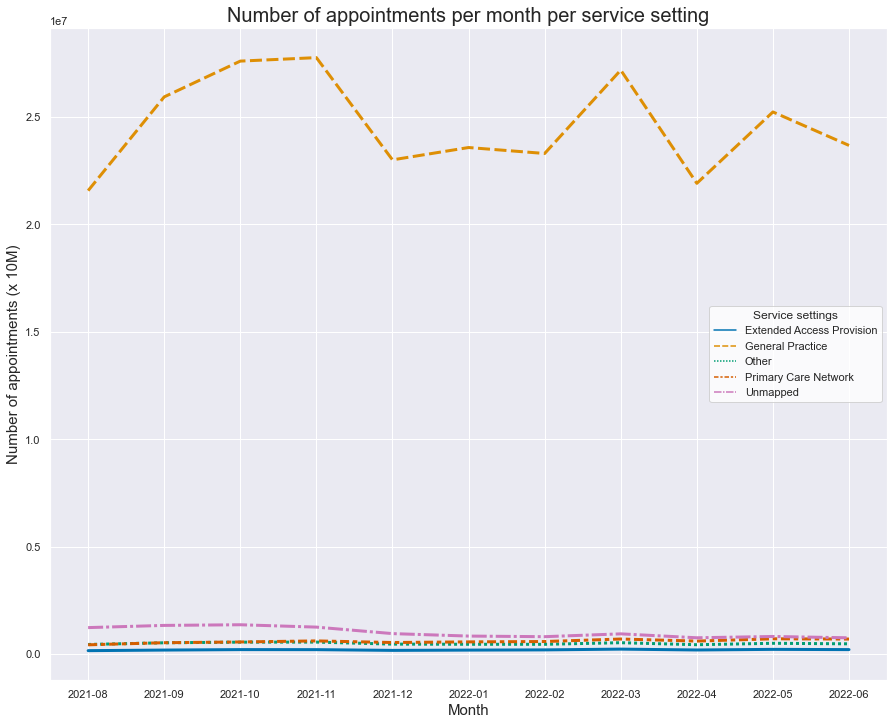

In [67]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
lineplot_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           data=national_categories_ss, hue='service_setting', 
                           palette='colorblind', linewidth=3, ci=None, 
                           style='service_setting')

# Update title, x and y labels and legend.
lineplot_ss.set_title('Number of appointments per month per service setting', 
                      fontdict={'fontsize':20})
lineplot_ss.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_ss.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_ss.legend(title='Service settings', facecolor='white') 

# Save plot as JPG image.
plt.savefig('app_ss.jpg', dpi=144)

# View plot.
plt.show()

# Vast majority of appointments in national_categories DataFrame are GP appointments. 
# Three noticeable peaks related to number of GP appointments were identified: autumn 
# months 2021, March 2022 and May 2022.

**Context types:**

In [68]:
# Aggregate on monthly level and determine the sum of records per month incl context types.
national_categories_ct = national_categories.groupby(['appointment_month', 'context_type'])\
['count_of_appointments'].sum().reset_index().copy()

# View output.
national_categories_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


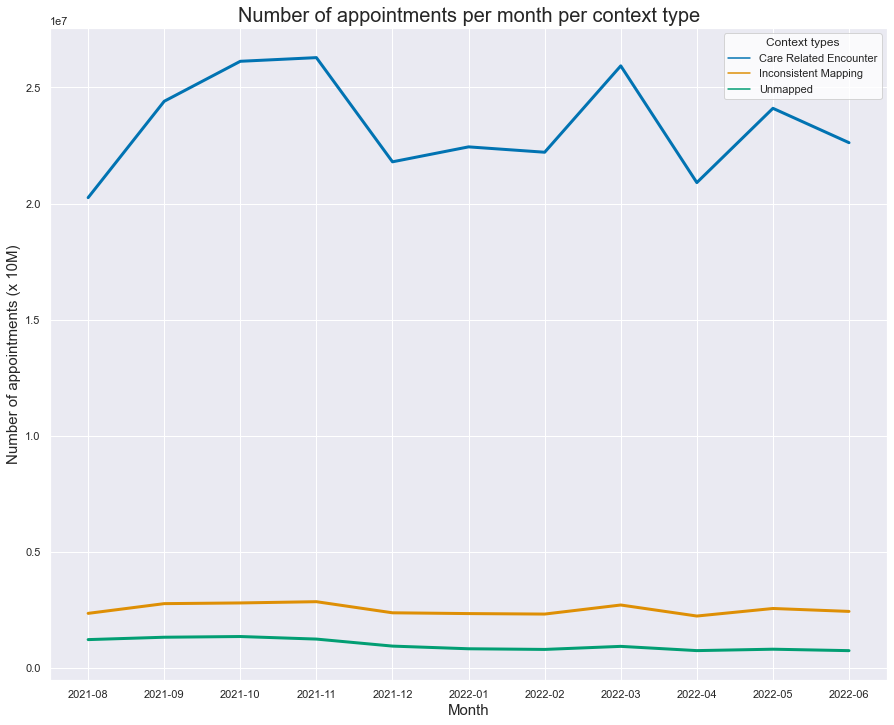

In [69]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
lineplot_ct = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           data=national_categories_ct, hue='context_type', 
                           palette='colorblind', linewidth=3, ci=None)

# Update title, x and y labels and legend.
lineplot_ct.set_title('Number of appointments per month per context type', 
                      fontdict={'fontsize':20})
lineplot_ct.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_ct.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_ct.legend(title='Context types', facecolor='white') 

# Save plot as JPG image.
plt.savefig('app_ct.jpg', dpi=144)

# View plot.
plt.show()

# Vast majority of appointments in national_categories DataFrame were logged as 
# ‘Care Related Encounter’. The seasonal trend is similar to the trend identified 
# in the first visualisation (related to number of GP appointments per month).

**National categories:**

In [70]:
# Aggregate on monthly level and determine the sum of records per month incl national 
# categories.
national_categories_nc = national_categories.groupby(['appointment_month', 'national_category'])\
['count_of_appointments'].sum().reset_index().copy()

# View output.
national_categories_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


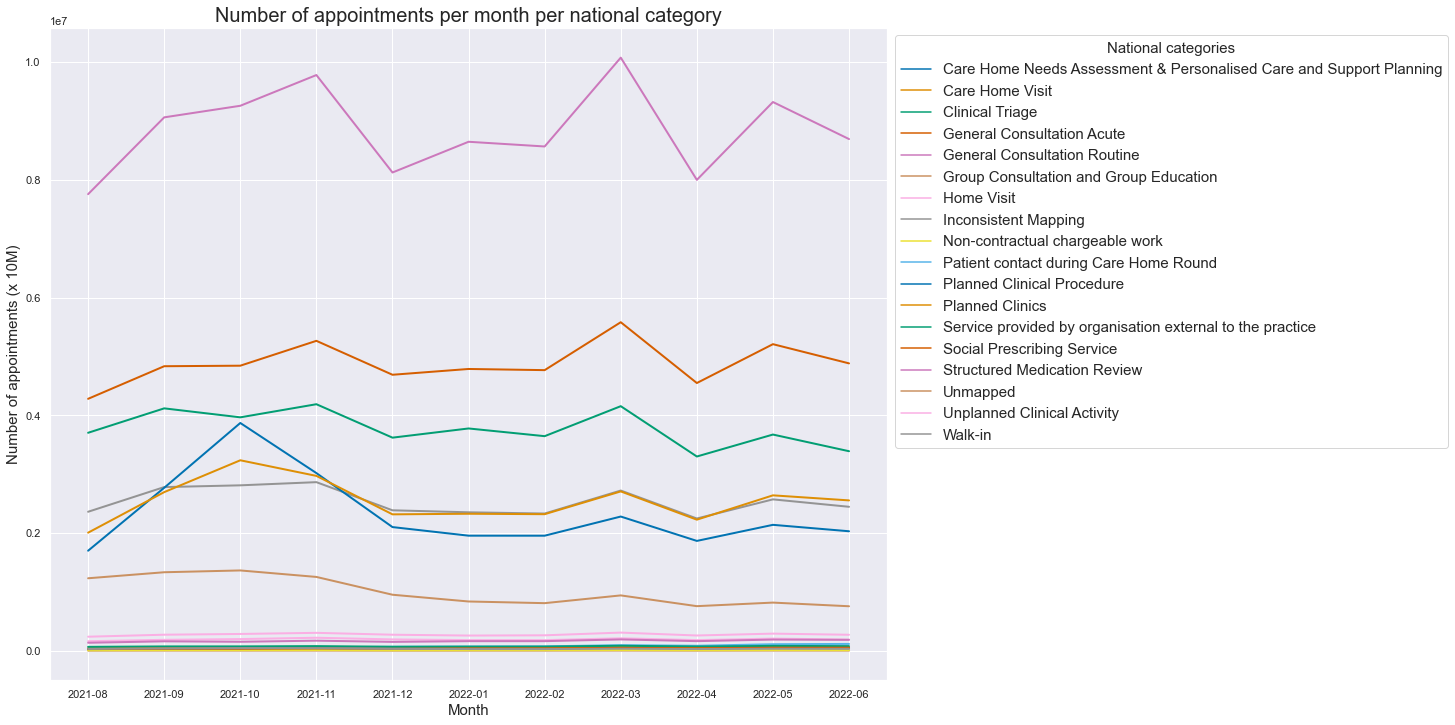

In [71]:
# Plot the appointments over the available date range, and review the national categories 
# for months.
# Create a lineplot.
lineplot_nc = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           data=national_categories_nc, hue='national_category', 
                           palette='colorblind', linewidth=2, ci=None)

# Update title, x and y labels and legend.
lineplot_nc.set_title('Number of appointments per month per national category', 
                      fontdict={'fontsize':20})
lineplot_nc.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_nc.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_nc.legend(title='National categories', facecolor='white', bbox_to_anchor=(1, 1), 
                   fontsize=15, title_fontsize=15) 

# View plot.
plt.show()

# Vast majority of appointments in national_categories DataFrame were logged as 
# ‘General Consultation Routine’. The seasonal trend is similar to the trend identified 
# in the first visualisation (related to number of GP appointments per month).

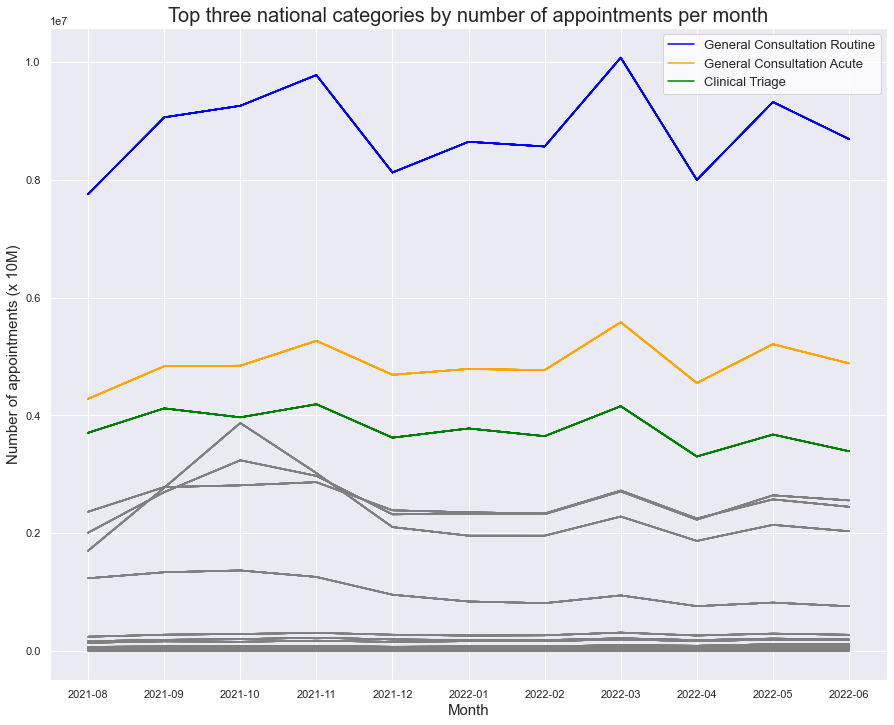

In [72]:
# Plot the appointments over the available date range, and review the national categories 
# for months highlighting top three national categories.
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

# Create a lineplot highlighting top three national categories by number of appointments 
# per month.
for national_category in national_categories_nc['national_category']:
    nc = national_categories_nc[national_categories_nc['national_category'] == national_category]
    if national_category == 'General Consultation Routine':
        line_color = 'blue'
    elif national_category == 'General Consultation Acute':
        line_color = 'orange'
    elif national_category == 'Clinical Triage':
        line_color = 'green'
    else:
        line_color = 'grey'
    ax.plot(nc['appointment_month'], nc['count_of_appointments'], color=line_color)

# Update title, x and y labels.
ax.set_title('Top three national categories by number of appointments per month', 
             fontdict={'fontsize':20})
ax.set_xlabel('Month', fontdict={'fontsize':15})
ax.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})

# Create a legend.
legend_elements = [Line2D([0], [0], color='blue', label='General Consultation Routine'),
                  Line2D([0], [0], color='orange', label='General Consultation Acute'),
                  Line2D([0], [0], color='green', label='Clinical Triage')]
plt.legend(loc='best', facecolor='white', fontsize=13, handles=legend_elements)

# Save plot as JPG image.
plt.savefig('app_nc.jpg', dpi=144)

# View plot.
plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [73]:
# Aggregate on daily level and determine the sum of records per day incl service settings.
# Create a separate data set that can be used in future weeks. 
national_categories_ss_day = national_categories.groupby(['appointment_date', 
                                                          'appointment_month', 
                                                          'service_setting'])\
['count_of_appointments'].sum().reset_index().copy()

# View output.
national_categories_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,9163
1666,2022-06-30,2022-06,General Practice,1124374
1667,2022-06-30,2022-06,Other,23115
1668,2022-06-30,2022-06,Primary Care Network,34774


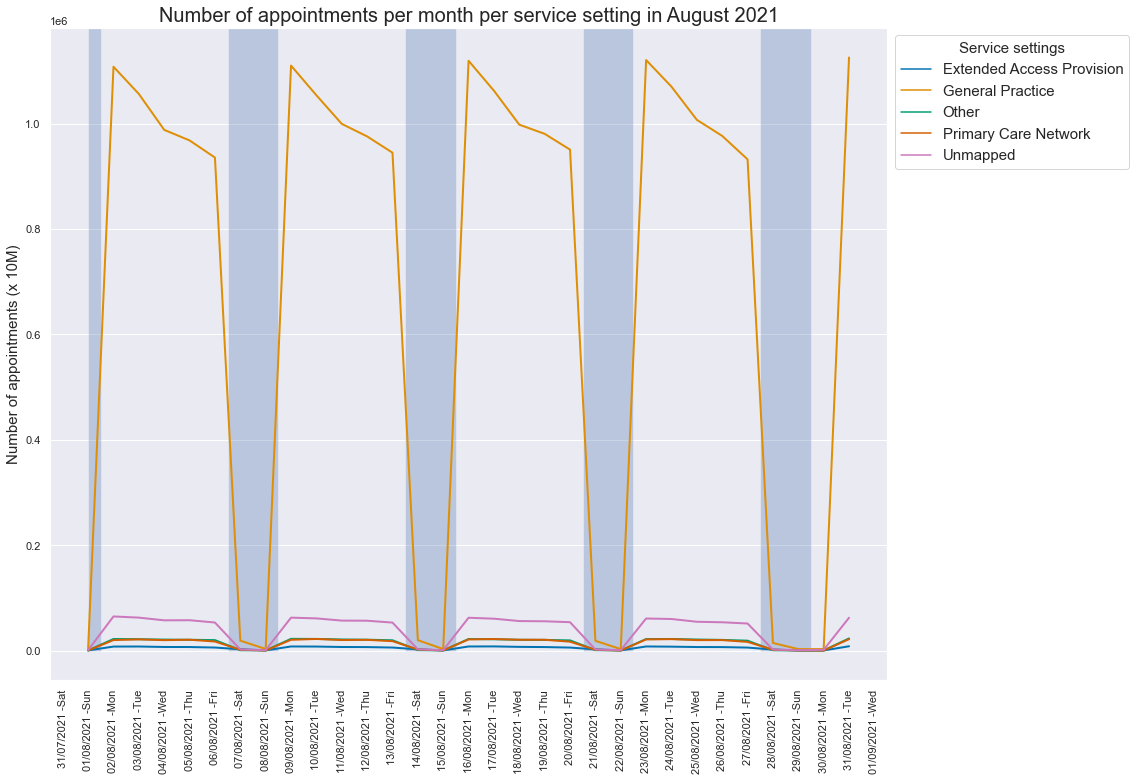

In [74]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
filter_aug_21 = national_categories_ss_day[
    national_categories_ss_day['appointment_month'] == '2021-08']

lineplot_aug_21 = sns.lineplot(x='appointment_date', y='count_of_appointments', 
                               data=filter_aug_21, hue='service_setting',  
                               palette='colorblind', linewidth=2, ci=None)

# Add every date of the period to the x-axis in the set format (Date-Week day).
plt.grid(axis='x')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y -%a'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=90)

# Highlight weekends (Saturday and Sunday) on the plot.
yl = plt.ylim()
plt.fill_between(filter_aug_21.appointment_date,
         (filter_aug_21.appointment_date.dt.dayofweek >= 5).astype(int) * yl[1],
         step='mid',
         alpha=.3)
plt.ylim(yl)

# Update title, x and y labels and legend.
lineplot_aug_21.set_title('Number of appointments per month per service setting in August 2021', 
                          fontdict={'fontsize':20})
lineplot_aug_21.set_xlabel('')
lineplot_aug_21.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_aug_21.legend(title='Service settings', facecolor='white', bbox_to_anchor=(1, 1),
                      fontsize=15, title_fontsize=15) 

# Save plot as JPG image.
plt.savefig('aug_21.jpg', dpi=144, bbox_inches='tight')

# View plot.
plt.show()

# More appointments were booked for the first half of the week, noticeably fewer were 
# booked for Saturdays and none for Sundays. Similar number of appointmets were booked 
# on a weekly basis.

**Autumn (October 2021):**

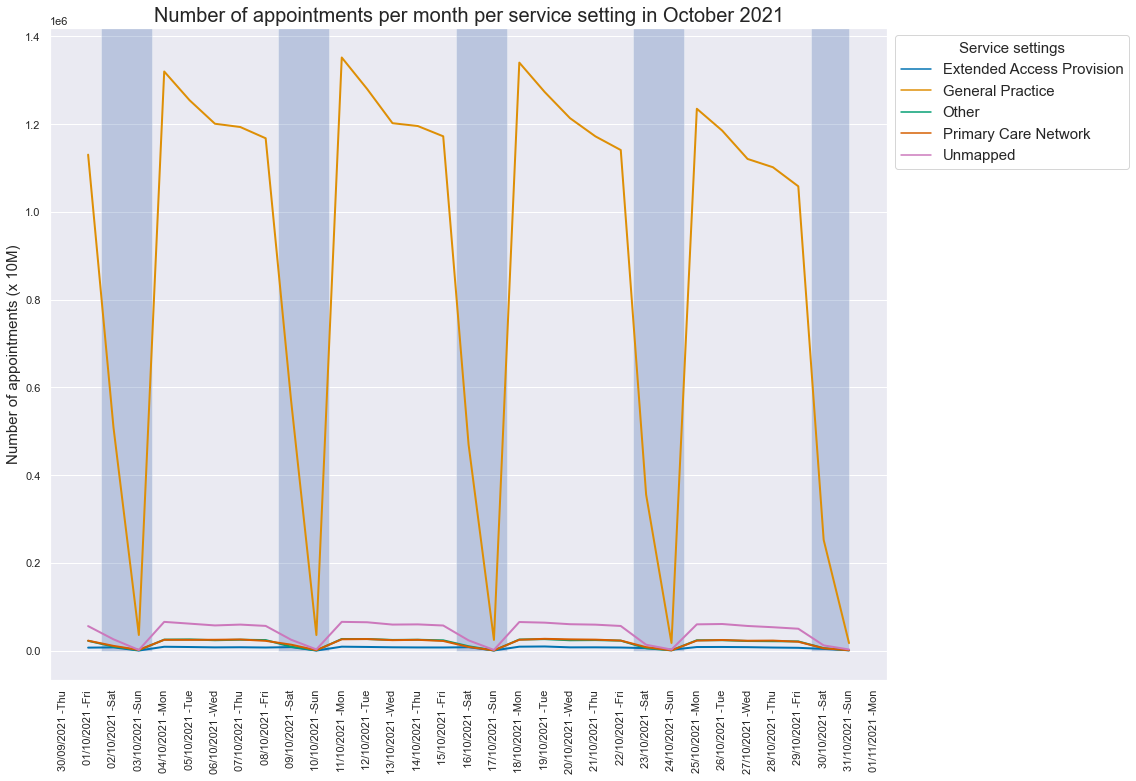

In [75]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
filter_oct_21 = national_categories_ss_day[
    national_categories_ss_day['appointment_month'] == '2021-10']

lineplot_oct_21 = sns.lineplot(x='appointment_date', y='count_of_appointments', 
                               data=filter_oct_21, hue='service_setting', 
                               palette='colorblind', linewidth=2, ci=None)

# Add every date of the period to the x-axis in the set format (Date-Week day).
plt.grid(axis='x')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y -%a'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=90)

# Highlight weekends (Saturday and Sunday) on the plot.
yl = plt.ylim()
plt.fill_between(filter_oct_21.appointment_date,
         (filter_oct_21.appointment_date.dt.dayofweek >= 5).astype(int) * yl[1],
         step='mid',
         alpha=.3)
plt.ylim(yl)

# Update title, x and y labels and legend.
lineplot_oct_21.set_title('Number of appointments per month per service setting in October 2021', 
                          fontdict={'fontsize':20})
lineplot_oct_21.set_xlabel('')
lineplot_oct_21.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_oct_21.legend(title='Service settings', facecolor='white', bbox_to_anchor=(1, 1),
                      fontsize=15, title_fontsize=15) 

# Save plot as JPG image.
plt.savefig('oct_21.jpg', dpi=144, bbox_inches='tight')

# View plot.
plt.show()

# More appointments were booked for the first half of the week, noticeably fewer were 
# booked for Saturdays and very few for Sundays (only GP). More GP appointmets were booked 
# during the middle of the month.

**Winter (January 2022):**

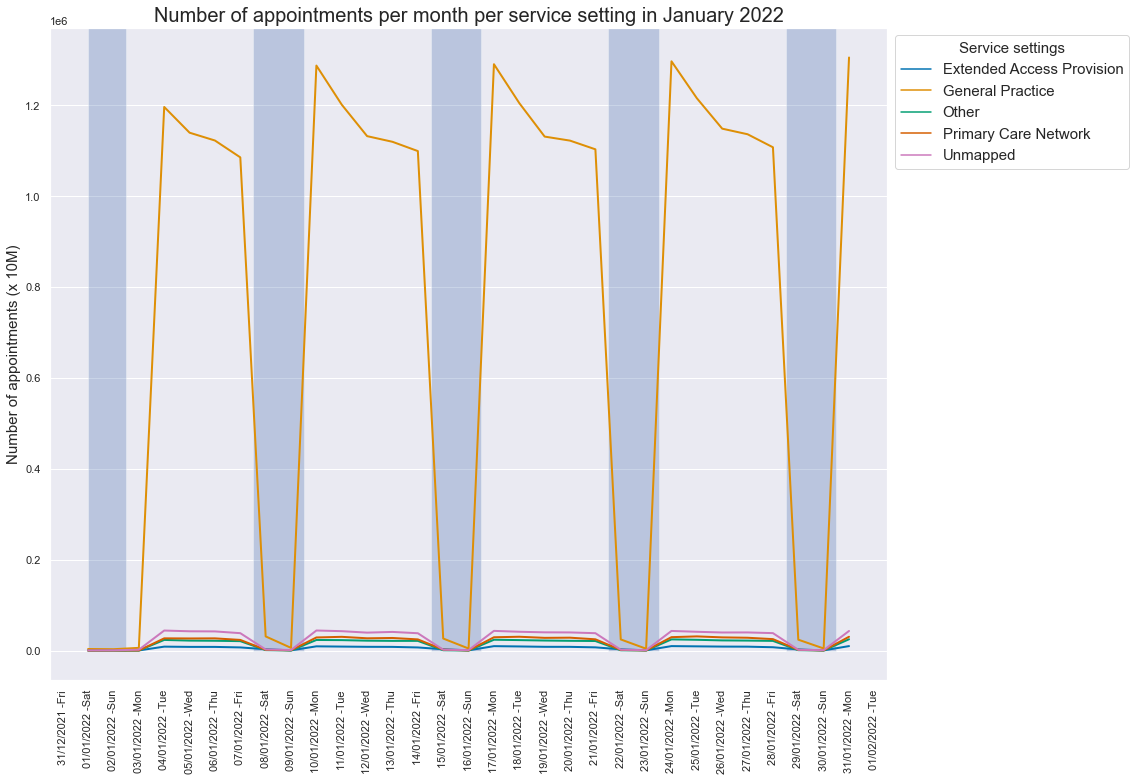

In [76]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
filter_jan_22 = national_categories_ss_day[
    national_categories_ss_day['appointment_month'] == '2022-01']

lineplot_jan_22 = sns.lineplot(x='appointment_date', y='count_of_appointments', 
                               data=filter_jan_22, hue='service_setting', 
                               palette='colorblind', linewidth=2, ci=None)

# Add every date of the period to the x-axis in the set format (Date-Week day).
plt.grid(axis='x')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y -%a'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=90)

# Highlight weekends (Saturday and Sunday) on the plot.
yl = plt.ylim()
plt.fill_between(filter_jan_22.appointment_date,
         (filter_jan_22.appointment_date.dt.dayofweek >= 5).astype(int) * yl[1],
         step='mid',
         alpha=.3)
plt.ylim(yl)

# Update title, x and y labels and legend.
lineplot_jan_22.set_title('Number of appointments per month per service setting in January 2022', 
                          fontdict={'fontsize':20})
lineplot_jan_22.set_xlabel('')
lineplot_jan_22.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_jan_22.legend(title='Service settings', facecolor='white', bbox_to_anchor=(1, 1),
                      fontsize=15, title_fontsize=15) 

# Save plot as JPG image.
plt.savefig('jan_22.jpg', dpi=144, bbox_inches='tight')

# View plot.
plt.show()

# More appointments were booked for the first half of the week, noticeably fewer were 
# booked for Saturdays and none for Sundays and January Bank Holidays. More GP appointmets 
# were booked during the second half of the month.

**Spring (April 2022):**

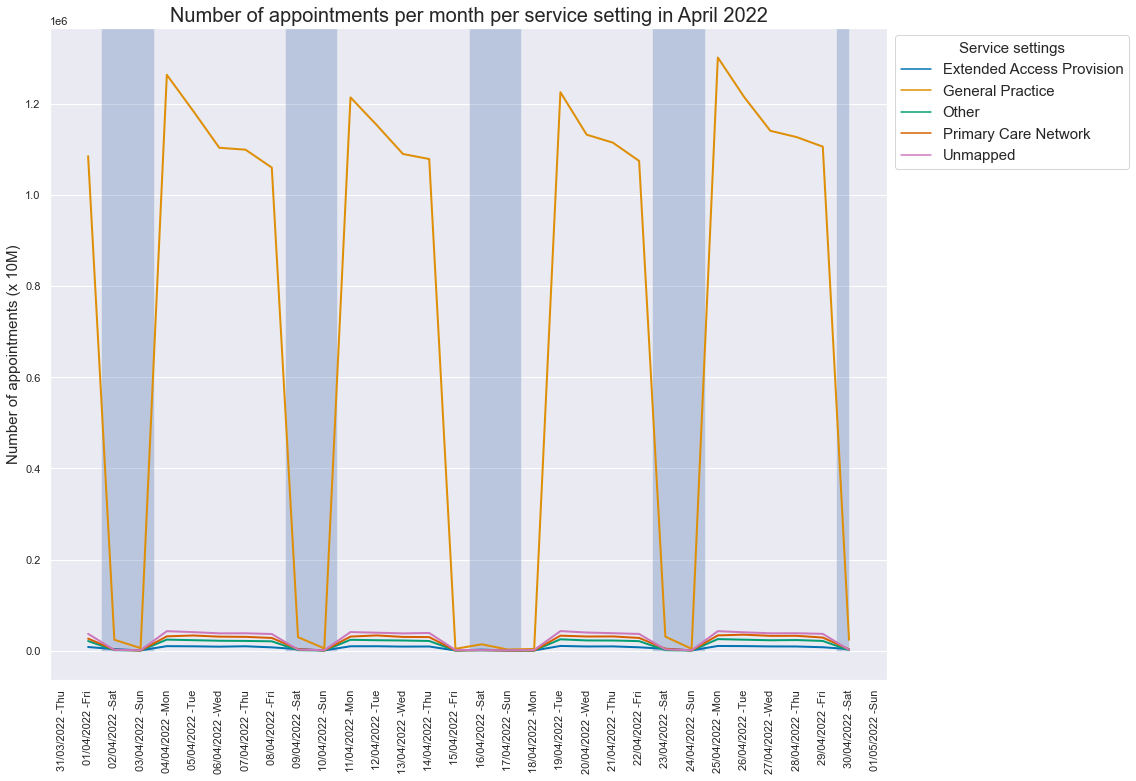

In [77]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
filter_apr_22 = national_categories_ss_day[
    national_categories_ss_day['appointment_month'] == '2022-04']

lineplot_apr_22 = sns.lineplot(x='appointment_date', y='count_of_appointments', 
                               data=filter_apr_22, hue='service_setting', 
                               palette='colorblind', linewidth=2, ci=None)

# Add every date of the period to the x-axis in the set format (Date-Week day).
plt.grid(axis='x')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y -%a'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=90)

# Highlight weekends (Saturday and Sunday) on the plot.
yl = plt.ylim()
plt.fill_between(filter_apr_22.appointment_date,
         (filter_apr_22.appointment_date.dt.dayofweek >= 5).astype(int) * yl[1],
         step='mid',
         alpha=.3)
plt.ylim(yl)

# Update title, x and y labels and legend.
lineplot_apr_22.set_title('Number of appointments per month per service setting in April 2022', 
                          fontdict={'fontsize':20})
lineplot_apr_22.set_xlabel('')
lineplot_apr_22.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_apr_22.legend(title='Service settings', facecolor='white', bbox_to_anchor=(1, 1),
                      fontsize=15, title_fontsize=15) 

# Save plot as JPG image.
plt.savefig('apr_22.jpg', dpi=144, bbox_inches='tight')

# View plot.
plt.show()

# More appointments were booked for the first half of the week, noticeably fewer were 
# booked for Saturdays and none for Sundays and Easter Bank Holidays. More GP appointmets 
# were booked at the beginning and end of the month.

**Additional questions:**

**Question:** Visualise gp_covid Dataframe from part 4, Q7 and look for any correlations between number of COVID cases and number of GP appointments. 

In [78]:
# Create a new DataFrame and sort it by month-year (set as index).
gp_covid_sort = gp_covid.sort_values('appointment_month').set_index('appointment_month')

# View DataFrame.
gp_covid_sort

,service_setting,count_of_appointments,New_COVID_cases
appointment_month,,,
2021-08,General Practice,21575852,813328
2021-09,General Practice,25940821,790849
2021-10,General Practice,27606171,1086475
2021-11,General Practice,27767889,1044128
2021-12,General Practice,23008818,3025835
2022-01,General Practice,23583053,3534339
2022-02,General Practice,23305934,1210795
2022-03,General Practice,27187368,1981764
2022-04,General Practice,21916791,737295


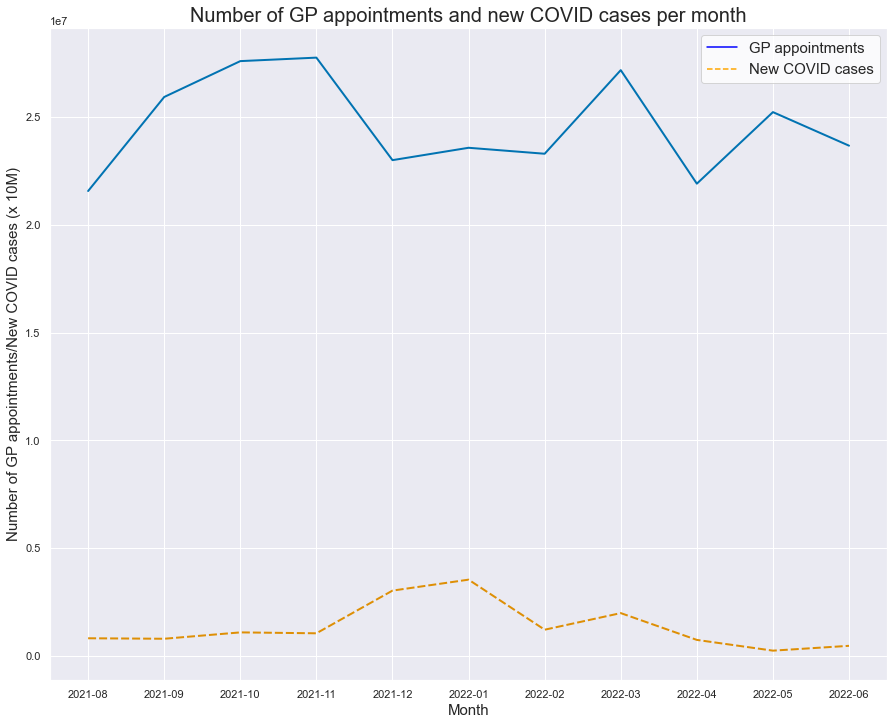

In [79]:
# Create a lineplot to show change in number og GP appointments and new COVID cases per month.
lineplot_gp_covid = sns.lineplot(data=gp_covid_sort, palette='colorblind', linewidth=2, 
                                 ci=None)

# Update title, x and y labels.
lineplot_gp_covid.set_title('Number of GP appointments and new COVID cases per month', 
                      fontdict={'fontsize':20})
lineplot_gp_covid.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_gp_covid.set_ylabel('Number of GP appointments/New COVID cases (x 10M)', 
                             fontdict={'fontsize':15})


# Update legend.
legend_elements = [Line2D([0], [0], color='blue', label='GP appointments'),
                  Line2D([0], [0], color='orange', label='New COVID cases', 
                         linestyle='--')]

lineplot_gp_covid.legend(facecolor='white', fontsize=15, title_fontsize=15, 
                         handles=legend_elements) 

# Save plot as JPG image.
plt.savefig('gp_covid.jpg', dpi=144)

# View plot.
plt.show()

# A pattern showing that public self-isolation caused by positive COVID testing might have 
# reduced number of GP appointments were observed but has to be further investigated.

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [80]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as darkgrid.
sns.set_style('darkgrid')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [81]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [82]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [83]:
# Explore the data set.

print('Sum of missing values:\n', tweets.isnull().sum()) 

tweets.describe()

Sum of missing values:
 tweet_id                     0
tweet_full_text              0
tweet_entities               0
tweet_entities_hashtags    167
tweet_metadata               0
tweet_retweet_count          0
tweet_favorite_count         0
tweet_favorited              0
tweet_retweeted              0
tweet_lang                   0
dtype: int64


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [84]:
# Would it be useful to only look at retweeted and favourite tweet messages?

print('Count of retweeted messages:\n', tweets['tweet_retweet_count'].value_counts())
print('\nCount of favourite messages:\n', tweets['tweet_favorite_count'].value_counts())

# 526 out of 1174 messages were not retweeted, which equals 44.80% of all messages.
# 1027 out of 1174 messages were not marked as favourite, which equals 87.48% of all messages.
# We will exclude the significant number of messages if only look at retweeted and favourite 
# tweet messages.

Count of retweeted messages:
 0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

Count of favourite messages:
 0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


In [85]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [86]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [87]:
# Display the first 30 records.
tags_sr = pd.Series(tags).value_counts()

tags_sr.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [88]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags_sr).reset_index()

# Rename the columns.
data = data.rename(columns={'index':'word', 0:'count'})

print(data.dtypes)
data

word     object
count     int64
dtype: object


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [89]:
# Sense-check the DataFrame.
print(data.info())
print('\nSum of missing values:\n', data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB
None

Sum of missing values:
 word     0
count    0
dtype: int64


In [90]:
# Display records where the count is larger than 10.
data_10 = data[data['count']>10]

data_10

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


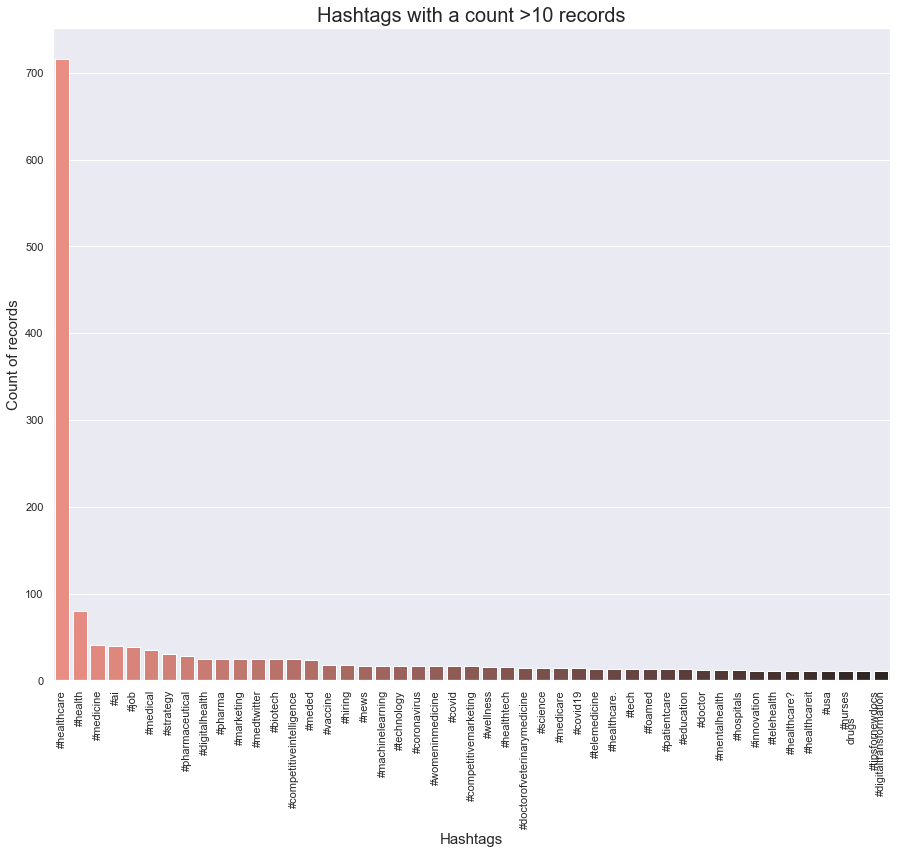

In [91]:
# Create a Seaborn barplot indicating records with a count >10 records.
barplot_tw = sns.barplot(x='word', y='count', data=data_10, palette='dark:salmon_r')

# Update title, x and y labels.
barplot_tw.set_title('Hashtags with a count >10 records', fontdict={'fontsize':20})
barplot_tw.set_xlabel('Hashtags', fontdict={'fontsize':15})
barplot_tw.set_ylabel('Count of records', fontdict={'fontsize':15})
plt.xticks(rotation=90)

# Save plot as JPG image.
plt.savefig('barplot_tw.jpg', dpi=144)

# View plot.
plt.show()

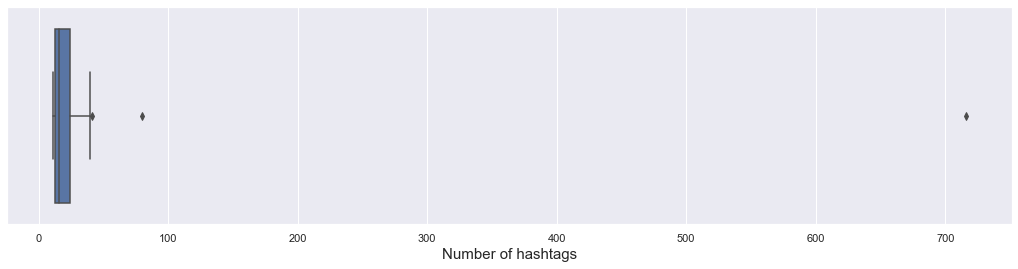

In [92]:
# Create a boxplot to see outliers.
fig = plt.figure(figsize=(18, 4))
boxplot_tw = sns.boxplot(x=data_10['count'], whis=1.5)

# Update title, x and y labels.
boxplot_tw.set_xlabel('Number of hashtags', fontdict={'fontsize':15})

# View the boxplot.
plt.show()

# Three outliers were identified.

In [93]:
# The columns you want to search for outliers in.
cols = ['count'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = data_10['count'].quantile(0.25) 
Q3 = data_10['count'].quantile(0.75)
IQR = Q3 - Q1
print('Q1=', Q1)
print('Q3=', Q3)
print('IQR=', IQR)

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((data_10['count'] < (Q1 - 1.5 * IQR)) | (data_10['count'] > (Q3 + 1.5 * IQR)))

# Filter our DataFrame based on condition.
data_10_non_outlier = data_10[condition]

print(data_10_non_outlier.shape)
data_10_non_outlier

Q1= 13.0
Q3= 24.0
IQR= 11.0
(44, 2)


,word,count
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25
11,#medtwitter,24
12,#biotech,24


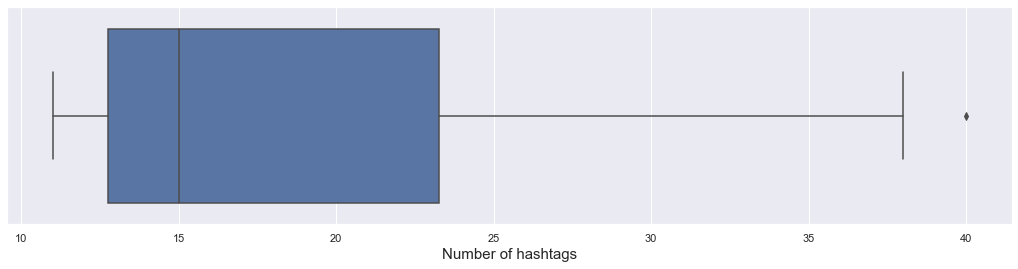

In [94]:
# Plot to see if outliers have been removed: 
# whis=multiplicative factor.
fig = plt.subplots(figsize=(18, 4))

boxplot_tw1 = sns.boxplot(x=data_10_non_outlier['count'], whis=1.5)

# Update title, x and y labels.
boxplot_tw1.set_xlabel('Number of hashtags', fontdict={'fontsize':15})

# View the boxplot.
plt.show()

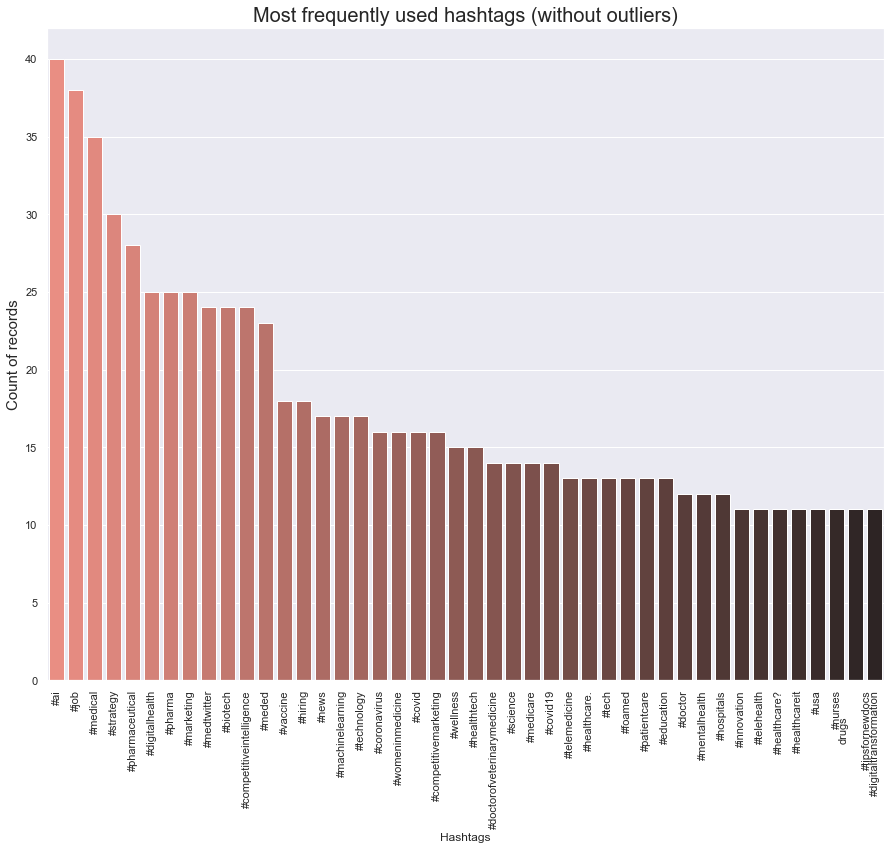

In [95]:
# Create the plot displaying the frequently used # without outliers.
barplot_tw1 = sns.barplot(x='word', y='count', data=data_10_non_outlier, 
                         palette='dark:salmon_r')

# Update title, x and y labels.
barplot_tw1.set_title('Most frequently used hashtags (without outliers)', fontdict={'fontsize':20})
barplot_tw1.set_xlabel('Hashtags', fontdict={'fontsize':12})
barplot_tw1.set_ylabel('Count of records', fontdict={'fontsize':15})
plt.xticks(rotation=90)

# View the barplot.
plt.show()

In [96]:
# Count the number of # used only once in the data set.
data[data['count'] == 1][['count']].count()

count    1313
dtype: int64

In [97]:
# How often hashtags related to the healthcare in the UK were used in the data set.

# Create a list of words to look for.
nhs_uk = ['nhs', 'nationalhealthservice', 'healthservice', 'uk', 'england']

# Create a DataFrame containing hashtags with words identified in 'nhs_uk' list.
nhs_uk_df = data.loc[(data['word'].str.contains('|'.join(nhs)))].reset_index(drop=True)

# View DataFrame.
nhs_uk_df

NameError: name 'nhs' is not defined

In [ ]:
# Export above DataFrame as CSV file.
nhs_uk_df.to_csv('nhs_uk_df.csv')

In [ ]:
# Group hashtags by categories/lists.
healthcare = ['nhs', 'healthcare', 'medicare', 'patientcare', 'medicalcare', 'primarycare', 
             'preventivecare', 'trangendercare', 'genderaffirmingcare', 'homecare',
            'virtualcare', 'urgentcare', 'hivcare', 'homcareservices', 'dentalcare',
            'nursingcare', 'eyecare', 'luxuryheathcare', 'healthc…', 'therapy', 
              'dentistry', 'selfcare', 'medicalhelp', 'treatments','savinglives', 
              'treatmentplanning', 'schedulingappointments', 'publichealth', 
              'communityhealth', 'ruralhealth', 'globalhealth', 'medicalservices']

health = ['mentalhealth', 'mhealth', 'hormonesandyourhealth', 'healthandwellness', 
          'healthy', 'goodhealth', 'healthissues', 'womenshealth', 'healthylifestyle',
         'healthpromotion', 'naturalhealth', 'healthoutcomes', 'bonehealth', 'health.',
         'dentalhealth', 'category-health', 'behavioralhealth', '\n\n#health',
         'organs.\n#health', 'consumerhealth', 'childhealth', 'cardiovascularhealth',
         'wellness', 'healt…', 'abortion', 'mammogram', 'hpv', 'xrays', 'healing',
         'monkeypox', 'monkeypoxcases', 'liquidbiopsy', 'skincare', 'hiv', 'heart']

healthtech = ['digitalhealth', 'telehealth', 'ehealth', 'healthit', 'healthtec…', 
              'electronichealthrecord', 'soteradigitalhealth', 'healthinfo', 
              'healthtechnology', 'healthapps', 'trackyourhealthjourney', 'virtualhealth',
             'biotech', 'technology', 'telemedicine', 'tech', 'medtech', 'cancer',
             'oncology\n\nmore']

pharmaceutical = ['medicine', 'pharmaceutical', 'pharma', 'medicalsupply', 'medicaldevices',
                 'medicalsupplies']

COVID = ['vaccine', 'coronavirus', 'covid', 'covid19', 'pandemic', 'vaccines', 'virus', 
         'corona', 'vaccination', 'lockdown']

news_marketing = ['marketing', 'medtwitter', 'competitiveintelligence', 'news', 
                  'competitivemarketing', 'productmarketing', 'new', 'advertising',
                 'media', 'socialmedia']

staff = ['job', 'hiring', 'doctor', 'nurses', 'nursing', 'mediqueststaffing', 
         'formularymanagement', 'nurse', 'jobs', 'doctors', 'careers', 'leadership',
        'professionalservices', 'employment', 'work', 'seniors', 'flexibility',
        'staffing', 'applications', 'physicians', 'beststaffever', 'beststaff']

hospital = ['hospitals', 'hospital', 'medicalrecords', 'hospitaloperations', 
            'patientdata…', 'patients', 'hospice']

data_science = ['ai', 'machinelearning', 'science', 'innovation', 'python', 'data', 
                'artificialintelligence', 'cloud', 'digitaltransformation', 'robotics',
               'bigdata', 'research', 'lifescience', 'ai-led', 'innovationchallenge',
               'southernclinicalresearchassociates', 'clincalresearch', 'cellbiology',
               'robotic', 'drugdiscovery', 'java', 'javascript']

# Copy data DataFrame.
data1 = data.copy()

# All individual hasgtags in column 'word' which follow in one of the above lists 
# replace by the respective list name.

# Replace by #healthcare all hashtags in column 'word' which are included in list 
# 'healthcare'.
data1.loc[(data1['word'].str.contains('|'.join(healthcare))), 'word'] = '#healthcare'

# Replace by #health all hashtags in column 'word' which are included in list 'health'
# apart from #healthcare, etc.
data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    data1['word'].str.contains('|'.join(health))), 'word'] = '#health'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    data1['word'].str.contains('|'.join(healthtech))), 'word'] = '#healthtech'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    ~data1['word'].str.contains('#healthtech')) & (
    data1['word'].str.contains('|'.join(pharmaceutical))), 'word'] = '#pharmaceutical'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    ~data1['word'].str.contains('#healthtech')) & (
    ~data1['word'].str.contains('#pharmaceutical')) & (
    data1['word'].str.contains('|'.join(COVID))), 'word'] = '#COVID'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    ~data1['word'].str.contains('#healthtech')) & (
    ~data1['word'].str.contains('#pharmaceutical')) & (
    ~data1['word'].str.contains('#COVID')) & (
    data1['word'].str.contains('|'.join(news_marketing))), 'word'] = '#news/marketing'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    ~data1['word'].str.contains('#healthtech')) & (
    ~data1['word'].str.contains('#pharmaceutical')) & (
    ~data1['word'].str.contains('#COVID')) & (
    ~data1['word'].str.contains('#news/marketing')) & (
    data1['word'].str.contains('|'.join(staff))), 'word'] = '#staff'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    ~data1['word'].str.contains('#healthtech')) & (
    ~data1['word'].str.contains('#pharmaceutical')) & (
    ~data1['word'].str.contains('#COVID')) & (
    ~data1['word'].str.contains('#news/marketing')) & (
    ~data1['word'].str.contains('#staff')) & (
    data1['word'].str.contains('|'.join(hospital))), 'word'] = '#hospital'

data1.loc[(~data1['word'].str.contains('#healthcare')) & (
    ~data1['word'].str.contains('#health')) & (
    ~data1['word'].str.contains('#healthtech')) & (
    ~data1['word'].str.contains('#pharmaceutical')) & (
    ~data1['word'].str.contains('#COVID')) & (
    ~data1['word'].str.contains('#news/marketing')) & (
    ~data1['word'].str.contains('#staff')) & (
    ~data1['word'].str.contains('#hospital')) & (
    data1['word'].str.contains('|'.join(data_science))), 'word'] = '#data/science'

# View DataFrame.
data1

In [ ]:
# Group data by hashtags and sum count column accordingly.
data_group = data1.groupby('word')[['count']].sum().sort_values('count', ascending=False).\
reset_index()

# View DataFrame.
data_group

In [ ]:
# Create the plot displaying the frequently used #.
barplot_tw = sns.barplot(x='word', y='count', data=data_group.head(10), 
                         palette='dark:salmon_r')

# Update title, x and y labels.
barplot_tw.set_title('Top 10 most popular hashtags (grouped)', 
                     fontdict={'fontsize':20})
barplot_tw.set_xlabel('Hashtags', fontdict={'fontsize':15})
barplot_tw.set_ylabel('Count of records', fontdict={'fontsize':15})
plt.xticks(rotation=45)

# Save plot as JPG image.
plt.savefig('top10_tw.jpg', dpi=144)

# View the barplot.
plt.show()

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [ ]:
# View appointments_regional DataFrame.
appointments_regional.head()

In [ ]:
# Print the min and max dates.
print('Appointments from:', appointments_regional['appointment_month'].min())
print('Appointments up to (including):', appointments_regional['appointment_month'].max())

In [ ]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_group = appointments_regional[
    appointments_regional['appointment_month'] >= '2021-08']

# View DataFrame.
ar_group

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [ ]:
# Create an aggregated data set to review the different features.
ar_group_agg = ar_group.groupby(['appointment_month', 'appointment_status', 'hcp_type', 
                                  'appointment_mode', 'time_between_book_and_appointment'], 
                                 as_index=False)['count_of_appointments'].sum()

# View the DataFrame.
ar_group_agg['appointment_mode'].value_counts()

In [ ]:
# Export above DataFrame as CSV file.
ar_group_agg['appointment_mode'].value_counts().to_csv('App_type.csv')

In [ ]:
# Determine the total number of appointments per month.
ar_group_df = ar_group_agg.groupby('appointment_month')['count_of_appointments'].sum().\
reset_index()

# Add a new column to indicate the average number of appointmets per day by month.
# Monthly aggregate / 30 to get to a daily value.
ar_group_df['avg_app_day'] = (ar_group_df['count_of_appointments']/30).round(decimals = 1)

# Add a new column to indicate a maximum of 1,200,000 appointments per day which NHS can 
# accommodate.
ar_group_df['max_app_day'] = 1200000

# What percentage of daily appointments are utilised.
ar_group_df['app_util_%'] = (ar_group_df['avg_app_day'] * 100 / ar_group_df['max_app_day']).\
                            round(decimals = 2)

# View the DataFrame.
print(ar_group_df.dtypes)
ar_group_df

In [ ]:
# Export above DataFrame as CSV file.
ar_group_df.to_csv('utilisation.csv')

In [ ]:
# Plot sum of count of monthly visits.
lineplot_sc = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           data=ar_group_df, linewidth=3, ci=None)

# Update title, x and y labels and legend.
lineplot_sc.set_title('Number of appointments per month', 
                      fontdict={'fontsize':20})
lineplot_sc.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_sc.set_ylabel('Number of appointments (x10M)', fontdict={'fontsize':15})

# Create a lineplot with Seaborn.
plt.show()

# Three noticeable peaks related to number of appointments per month were identified: 
# autumn months 2021, March 2022 and May 2022.

In [ ]:
# Plot monthly capacity utilisation.
lineplot_u = sns.lineplot(x='appointment_month', y='avg_app_day', 
                           data=ar_group_df, linewidth=3, ci=None)

lineplot_u.axhline(1200000, color = 'red', linestyle = '--', linewidth=2)

# Update title, x and y labels.
lineplot_u.set_title('Average utilisation of service', 
                      fontdict={'fontsize':20})
lineplot_u.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_u.set_ylabel('Number of appointments (x1M)', fontdict={'fontsize':15})

# Create a legend.
legend_elements = [Line2D([0], [0], color='red', label='Max appointments per day', 
                          linestyle = '--'),
                  Line2D([0], [0], color='blue', label='Avg appointments per day')]
plt.legend(loc='best', facecolor='white', fontsize=15, handles=legend_elements)

# Set the values for y-axis from 0.
lineplot_u.set_ylim([0, 1250000])

# Save plot as JPG image.
plt.savefig('utilisation.jpg', dpi=144)

# Create a lineplot.
plt.show()

# Number of average daily appointmets is lower the maximum daily NHS capacity throughout 
# the investigated period.

**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.
lineplot_hcp = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           hue='hcp_type', data=ar_group_agg, palette='colorblind',
                            linewidth=3, ci=None)

# Update title, x and y labels and legend.
lineplot_hcp.set_title('Number of appointments per month by healthcare professional type', 
                      fontdict={'fontsize':20})
lineplot_hcp.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_hcp.set_ylabel('Number of appointments (x100)', fontdict={'fontsize':15})
lineplot_hcp.legend(title='Healthcare professional types:', facecolor='white')

# Save plot as JPG image.
plt.savefig('hpt.jpg', dpi=144)

# Create a lineplot with Seaborn.
plt.show()

# GPs (GP registrar/Locum GP/Principal GP) run the highest number of appointments per month
# apart from October 2021, which needs to be further investigated.

**Question 3:** Are there significant changes in whether or not visits are attended?

In [ ]:
# Create a line plot to answer the question.
lineplot_as = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           hue='appointment_status', data=ar_group_agg, palette='colorblind', 
                           linewidth=3, ci=None)

# Update title, x and y labels and legend.
lineplot_as.set_title('Number of appointments per month by appointment status', 
                      fontdict={'fontsize':20})
lineplot_as.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_as.set_ylabel('Number of appointments (x100)', fontdict={'fontsize':15})
lineplot_as.legend(title='Appointment status:', facecolor='white')

# Create a lineplot with Seaborn.
plt.show()

# Number of attended appointments is significantly higher than appointments with other 
# statuses.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [ ]:
# Create a line plot to answer the question.
hue_order = ['Face-to-Face', 'Home Visit', 'Video/Online', 'Unknown', 'Telephone']
style_order = ['Home Visit', 'Video/Online', 'Face-to-Face', 'Unknown', 'Telephone']
lineplot_at = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           hue='appointment_mode', data=ar_group_agg, palette='colorblind',
                           linewidth=3, ci=None, hue_order=hue_order, 
                           style='appointment_mode', style_order=style_order)

# Update title, x and y labels and legend.
lineplot_at.set_title('Number of appointments per month by appointment type', 
                      fontdict={'fontsize':20})
lineplot_at.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_at.set_ylabel('Number of appointments (x100)', fontdict={'fontsize':15})
lineplot_at.legend(loc='best', title='Appointment types:', facecolor='white')

# Save plot as JPG image.
plt.savefig('appt.jpg', dpi=144)

# Create a lineplot with Seaborn.
plt.show()

# Majority of appointments were done face-to-face followed by telephone appointments.
# Face-to-face appointments have more uneven spread with clear peaks comparing to other 
# appointment types.

**Question 5:** Are there any trends in time between booking an appointment?

In [ ]:
# Create a line plot to answer the question.
lineplot_ta = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           hue='time_between_book_and_appointment', data=ar_group_agg, palette='colorblind', 
                           linewidth=3, ci=None)

# Update title, x and y labels and legend.
lineplot_ta.set_title('Number of appointments per month by time between book and appointment', 
                      fontdict={'fontsize':20})
lineplot_ta.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_ta.set_ylabel('Number of appointments (x100)', fontdict={'fontsize':15})
lineplot_ta.legend(loc='best', title='Time between book and appointment:', facecolor='white')

# Create a lineplot with Seaborn.
plt.show()

# Highest number of appointments in the dataset was booked for the same day, followed by 
# appointmets booked 2-7 days prior and 8-14 days prior.

**Question 6:** How do the spread of service settings compare?

In [ ]:
# Go back to the national category DataFrame you created in an earlier assignment activity.
national_categories.head()

In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_group = national_categories.groupby('appointment_month')['count_of_appointments'].sum().\
reset_index()

# View the DataFrame.
nc_group.head(10)

In [ ]:
# Go back to the national category DataFrame by service setting you created in an earlier 
# assignment activity.
national_categories_ss.head(10)

In [ ]:
# Create a boxplot to investigate spread of service settings.
# Create a line plot to answer the question.
lineplot_ss = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           data=national_categories_ss, hue='service_setting', 
                           palette='colorblind', linewidth=3, ci=None, 
                           style='service_setting')

# Update title, x and y labels and legend.
lineplot_ss.set_title('Number of appointments per month by service setting', 
                      fontdict={'fontsize':20})
lineplot_ss.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_ss.set_ylabel('Number of appointments (x 10M)', fontdict={'fontsize':15})
lineplot_ss.legend(title='Service settings', facecolor='white') 

# Save plot as JPG image.
plt.savefig('app_ss.jpg', dpi=144)

# Create a lineplot with Seaborn.
plt.show()

# GP run the highest number of appointments.

In [ ]:
# Create a boxplot to investigate the service settings without GP.
lineplot_ss1 = sns.lineplot(x='appointment_month', y='count_of_appointments', 
                           data=national_categories_ss[national_categories_ss[
                               'service_setting'] != 'General Practice'], 
                           hue='service_setting', palette='colorblind', linewidth=3, 
                            ci=None)

# Update title, x and y labels and legend.
lineplot_ss1.set_title('Number of appointments per month by service setting (excluding GP)', 
                      fontdict={'fontsize':20})
lineplot_ss1.set_xlabel('Month', fontdict={'fontsize':15})
lineplot_ss1.set_ylabel('Number of appointments (x 1M)', fontdict={'fontsize':15})
lineplot_ss1.legend(title='Service settings', facecolor='white') 

# Save plot as JPG image.
plt.savefig('app_ss_ex_gp.jpg', dpi=144)

# Create a lineplot with Seaborn.
plt.show()

# Whilst number of appointments conducted by an 'unmapped' service setting has a downward 
# trend, number of appointments conducted by other service settings have upward trends. 
# Further investigation is needed to understand if two above trends are related.

**Additional questions:**

**Question 7:** What was the actual utilisation of resources per sub-ICB location and by ICB area?    

In [ ]:
# Create an aggregated data set to see number of appointmets per month by location (sub-ICB).
nc_sicb_m = national_categories.groupby(['appointment_month', 'sub_icb_location_name'], 
                                        as_index=False)['count_of_appointments'].sum()

# View the DataFrame.
nc_sicb_m

In [ ]:
# Add a new column to indicate the average number of appointmets per day by month.
# Monthly aggregate / 30 to get to a daily value.
nc_sicb_m['avg_app_day'] = (nc_sicb_m['count_of_appointments']/30).round(decimals = 1)

# Add a new column to indicate a maximum of 11,320.75 (1,200,000/106 sub-ICB locations) 
# appointments per day which NHS can accommodate.
nc_sicb_m['max_app_day'] = 11320.75

# What percentage of daily appointments are utilised.
nc_sicb_m['app_util_%'] = (nc_sicb_m['avg_app_day'] * 100 / nc_sicb_m['max_app_day']).\
                            round(decimals = 2)

# View the DataFrame.
print(nc_sicb_m.dtypes)
nc_sicb_m

In [ ]:
# List of sub-ICB locations which go over the average maximum number of appointments per 
# month.
over_100 = nc_sicb_m[nc_sicb_m['app_util_%'] > 100]

# View the DataFrame.
over_100

In [ ]:
# Number of sub-ICB locations which had on average more then maximum daily appointments 
# per month.
over_100_m = over_100['appointment_month'].value_counts()

# View the DataFrame.
over_100_m

In [ ]:
# Export above DataFrame as CSV file.
over_100_m.to_csv('over_100_m.csv')

In [ ]:
# List of sub-ICB locations and number of months which they had on average more than maximum 
# daily appointments per month.
over_100_sicb = over_100['sub_icb_location_name'].value_counts().reset_index()

# View the DataFrame.
over_100_sicb

In [ ]:
# Export above DataFrame as CSV file.
over_100_sicb.to_csv('over_100_sicb.csv')

In [ ]:
# Create an aggregated data set to see number of appointmets per month by area (ICB).
nc_icb_m = national_categories.groupby(['appointment_month', 'icb_ons_code'], 
                                        as_index=False)['count_of_appointments'].sum()

# View the DataFrame.
nc_icb_m

In [ ]:
# Add a new column to indicate the average number of appointmets per day by month.
# Monthly aggregate / 30 to get to a daily value.
nc_icb_m['avg_app_day'] = (nc_icb_m['count_of_appointments']/30).round(decimals = 1)

# Add a new column to indicate a maximum of 11,320.75 (1,200,000/106 sub-ICB locations) 
# appointments per day which NHS can accommodate.
nc_icb_m['max_app_day'] = 28571.43 

# What percentage of daily appointments are utilised.
nc_icb_m['app_util_%'] = (nc_icb_m['avg_app_day'] * 100 / nc_icb_m['max_app_day']).\
                        round(decimals = 2)

# View the DataFrame.
print(nc_icb_m.dtypes)
nc_icb_m

In [ ]:
# List of ICB areas which go over the average maximum number of appointments per 
# month.
over_100_icb = nc_icb_m[nc_icb_m['app_util_%'] > 100]

# View the DataFrame.
over_100_icb

In [ ]:
# Number of ICB areas which had on average more then maximum daily appointments per month.
over_100_icb_m = over_100_icb['appointment_month'].value_counts()

# View the DataFrame.
over_100_icb_m

In [ ]:
# Export above DataFrame as CSV file.
over_100_icb_m.to_csv('over_100_icb_m.csv')

In [ ]:
# List of ICB areas and number of months which they had on average more than maximum 
# daily appointments per month.
over_100_icb1 = over_100_icb['icb_ons_code'].value_counts().reset_index()

# View the DataFrame.
over_100_icb1

# E54000008 - NHS Cheshire and Merseyside ICB;
# E54000027 - NHS North West London ICB;
# E54000050 - NHS North East and North Cumbria ICB;
# E54000054 - NHS West Yorkshire ICB;
# E54000057 - NHS Greater Manchester ICB;
# E54000029 - NHS North East London ICB;
# E54000042 - NHS Hampshire and Isle Of Wight ICB;
# E54000032 - NHS Kent and Medway ICB;
# E54000048 - NHS Lancashire and South Cumbria ICB;
# E54000051 - NHS Humber and North Yorkshire ICB;
# E54000053 - NHS Sussex ICB;
# E54000044 - NHS Buckinghamshire, Oxfordshire and Berkshire West ICB.

In [ ]:
# Export above DataFrame as CSV file.
over_100_icb1.to_csv('over_100_icb1.csv')

# 

### Provide a summary of your findings and recommendations based on the analysis.

•	In total average utilisation of service in NHS is below the set threshold suggesting that the organisation has enough capacity to handle the total amount of appointments. Nevertheless, 34 sub-ICBs and 12 ICBs had at least one month between August 2021 and June 2022 when they had on average more daily appointments than expected by NHS. 
67.65% of mentioned sub-ICBs and 41.67% of mentioned ICBs went above maximum threshold of average daily appointments in every month during the investigated period.
Those sub-ICBs and ICBs are at higher risk of being understaffed.
More detailed information for identified sub-ICBs and ICBs, including  utilisation of service percentages, is available in Fedorova_Oksana_DA201_Assignment_Notebook.ipynb 

•	Autumn months (November and October 2021 in particular) had the highest number of appointments followed by two spring months (March and May 2022). Additional staff resources might be required for those seasons.
The data did not have information about the nature/health issues of the appointments but if it can be grouped (e.g. respiratory infections related to the change of seasons), additional public education through social-media campaigns about how to avoid getting those infections might have a positive impact on reducing the number of appointments. 

•	More appointments were booked for the first half of the week, possibly because the majority of services are closed during the weekend, suggesting that more staff resources need to be allocated to the first half of the week. Less appointments were booked around Bank Holidays, possibly because a lot of people are away/on holidays around this time.
Majority of service settings are either closed or work reduced hours on Saturdays. Detailed information regarding opening hours were not included in the data set, therefore it was not possible to investigate the popularity of weekends among patients further.

•	Majority of appointments were booked as Face-to-Face, followed by telephone appointments. Video/Online appointments were among the least popular appointment types but have more advantages than telephone appointments and closer by nature to Face-to-Face appointments. 
Further investigation should be conducted about the reasons why Video/Online appointments were not conducted more often and potential benefits of these appointments.

•	More appointments were run by GP (GP registrar/Locum GP/Principal GP) between August 2021 and June 2022 apart from October 2021, when more appointments were run by ‘Other Practice Staff’. Which needs to be further investigated.

•	Highest number of attended appointments were booked on the same day (48.45%); followed by appointments booked 2-7 days prior (20.38%) and 8-14 days prior (11.08%), suggesting that the shorter the time between the date of booking the appointment and appointment date, the higher the chance that it will be attended.

•	Majority of appointments with known length were 6-10 minutes (20.12%); followed by 1-5 minutes appointments (17.03%) and 11-15 minutes (14.98%). Nature of shorter appointments needs to be further investigated and any alternatives how to reduce the number of  those appointments need to be explored.

•	91.24% of all appointments and 94.26% GP appointments in the data set were attended. 

•	Twitter search highlighted that NHS needs to encourage public to use more tailored to the organisation hashtags for getting more meaningful insights during further researches.

•	Further investigation is needed to identify reasons for unmapped/inconsistent 
mapping/unknown data entries in the data set in order to improve outputs of further analytical projects.